## Bond Breaking criterion analysis

In [1]:
import io
import subprocess
import warnings

import matplotlib.pyplot as plt
import numpy as np

# %matplotlib widget
warnings.filterwarnings("ignore")


### Parameters

In [2]:
nseeds = 5
seeds = np.repeat(range(1, nseeds + 1), 1)
bndbrkthresh = np.array([15, 20, 25, 30, 35, 40, 50, 60, 0])

### Read data files

In [3]:
stresstrainld = {}
stresstrainyz = {}
for s in seeds:
    for bb in bndbrkthresh:
        stresstrainldfile = (
            "seed{s}/UniaxialTensile/ld{bb}/stress_strain_box.dat".format(s=s, bb=bb)
        )
        stresstrainld[s, bb] = np.loadtxt(
            stresstrainldfile, skiprows=1, usecols=(1, 2, 3, 4)
        )
        stresstrainyzfile = "seed{s}/YZconstant/yz{bb}/stress_strain_box.dat".format(
            s=s, bb=bb
        )
        stresstrainyz[s, bb] = np.loadtxt(
            stresstrainyzfile, skiprows=1, usecols=(1, 2, 3, 4)
        )

### Choose a specific seed and look across all thresholds

In [24]:
seed = 2

In [58]:
seed = 2
bb =0
val=stresstrainyz[seed,bb][np.where(stresstrainyz[seed,bb][:,1]<3)]
for i in range(len(val)):
    if i==0:
        continue
    else:
        # if val[:,0][i]-val[:,0][i-1]<val[:,0][i+1]-val[:,0][i]:
        if val[:,0][i]>100:
            print(val[:,0][i])
            

429.049999999999
429.099999999999
429.274999999999
429.299999999999
429.374999999999
429.449999999999
429.499999999999
429.524999999999
429.649999999999
429.699999999999
429.749999999999
429.774999999999
429.824999999999
429.924999999999
429.999999999999
430.099999999999
430.124999999999
430.249999999999
430.874999999999
430.899999999999
430.924999999999
430.949999999999
430.999999999999
431.024999999999
431.074999999999
431.099999999999
431.124999999999
431.249999999999
431.274999999999
431.299999999999
431.324999999999
431.349999999999
431.399999999999
431.424999999999
431.499999999999
431.549999999999
431.574999999999
431.599999999999
431.624999999999
431.649999999999
431.674999999999
431.699999999999
431.724999999999
431.749999999999
431.774999999999
431.799999999999
431.824999999999
431.849999999999
431.874999999999
431.899999999999
431.924999999999
431.949999999999
431.974999999999
431.999999999999
432.024999999999
432.049999999999
432.074999999999
432.099999999999
432.1249999999

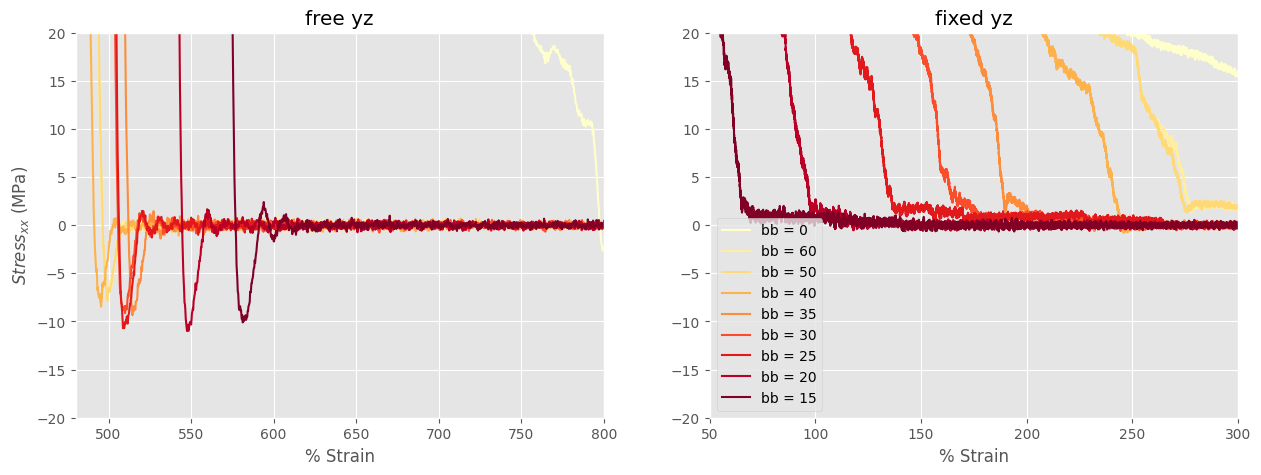

In [54]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part
ax[0].axis([480, 800, -20, 20])
ax[0].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    inflpt = np.gradient(stresstrainld[seed, bb][:, 1]).argmin()

    inflpt_i = inflpt - 80
    pty = stresstrainld[seed, bb][inflpt_i:inflpt, 1].max()
    maxindex = inflpt_i + stresstrainld[seed, bb][inflpt_i:inflpt, 1].argmax()
    ptx = stresstrainld[seed, bb][maxindex, 0]

    lines[bb, 0] = ax[0].plot(
        stresstrainld[seed, bb][:, 0],
        stresstrainld[seed, bb][:, 1],
        "-",
        label="bb = {bb}".format(s=seed, bb=bb),
        color=colormap[cl],
    )

    cl += 1

ax[0].set_xlabel("% Strain")
ax[0].set_ylabel("$Stress_{xx}$ (MPa)")
# ax[0, 0].legend()
ax[0].set_title("free yz")

# YZconstant part
ax[1].axis([50, 300, -20, 20])
ax[1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[bb, 1] = ax[1].plot(
        stresstrainyz[seed, bb][:, 0],
        stresstrainyz[seed, bb][:, 1],
        "-",
        label="bb = {bb}".format(s=seed, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[1].set_xlabel("% Strain")
ax[0].set_ylabel("$Stress_{xx}$ (MPa)")
ax[1].legend()
ax[1].set_title("fixed yz")

plt.show()

### Choose a bond breaking threshold and look across all seeds

In [4]:
# bb = [15, 20, 25, 30, 35, 40, 50, 60, 0]
bb = 0
seeds=[1,2,3,4,5]

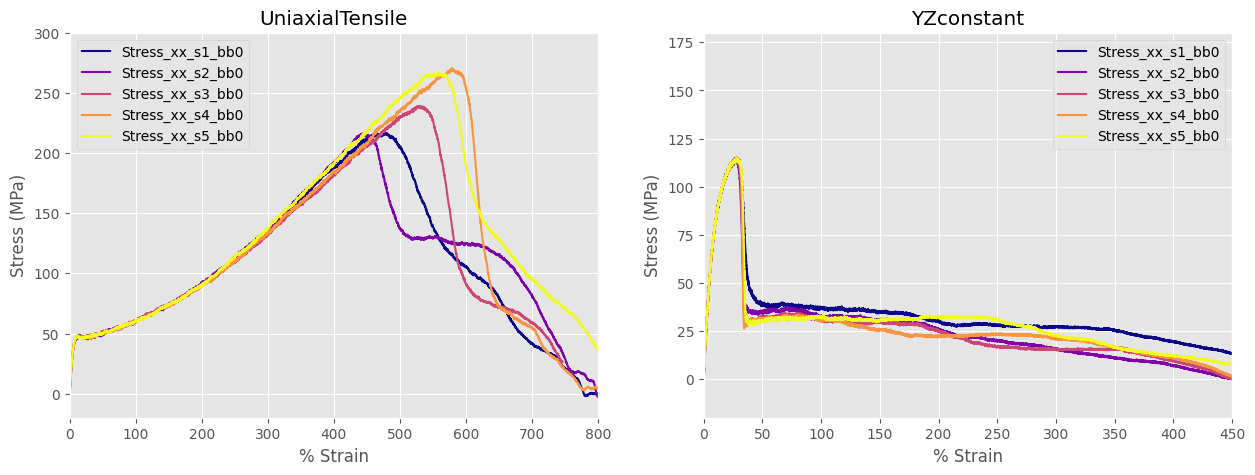

In [5]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2)

fig.set_size_inches(15, 5)

colormap = plt.cm.plasma(np.linspace(0, 1, len(seeds)))

# UniaxialTensile part
ax[0].axis([0, 800, -20, 300])
ax[0].grid(True)

lines = {}

cl = 0
for s in seeds:
    lines[s] = ax[0].plot(
        stresstrainld[s, bb][:, 0],
        stresstrainld[s, bb][:, 1],
        "-",
        label="Stress_xx_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[0].set_xlabel("% Strain")
ax[0].set_ylabel("Stress (MPa)")
ax[0].legend()
ax[0].set_title("UniaxialTensile")

# YZconstant part
ax[1].axis([0, 450, -20, 180])
ax[1].grid(True)

lines = {}

cl = 0
for s in seeds:
    lines[s] = ax[1].plot(
        stresstrainyz[s, bb][:, 0],
        stresstrainyz[s, bb][:, 1],
        "-",
        label="Stress_xx_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[1].set_xlabel("% Strain")
ax[1].set_ylabel("Stress (MPa)")
ax[1].legend()
ax[1].set_title("YZconstant")

plt.show()

### Averaged stress across seeds

In [14]:
meanstressld={}
errorstressld={}
meanstressyz={}
errorstressyz={}
for bb in bndbrkthresh:
        meanstressld[bb] = np.mean((stresstrainld[2,bb],stresstrainld[4,bb],stresstrainld[5,bb]),axis=0)
        errorstressld[bb] = np.std((stresstrainld[2,bb],stresstrainld[4,bb],stresstrainld[5,bb]),axis=0)
        meanstressyz[bb] = np.mean((stresstrainyz[2,bb],stresstrainyz[3,bb],stresstrainyz[4,bb],stresstrainyz[5,bb]),axis=0)
        errorstressyz[bb] = np.std((stresstrainyz[2,bb],stresstrainyz[3,bb],stresstrainyz[4,bb],stresstrainyz[5,bb]),axis=0)

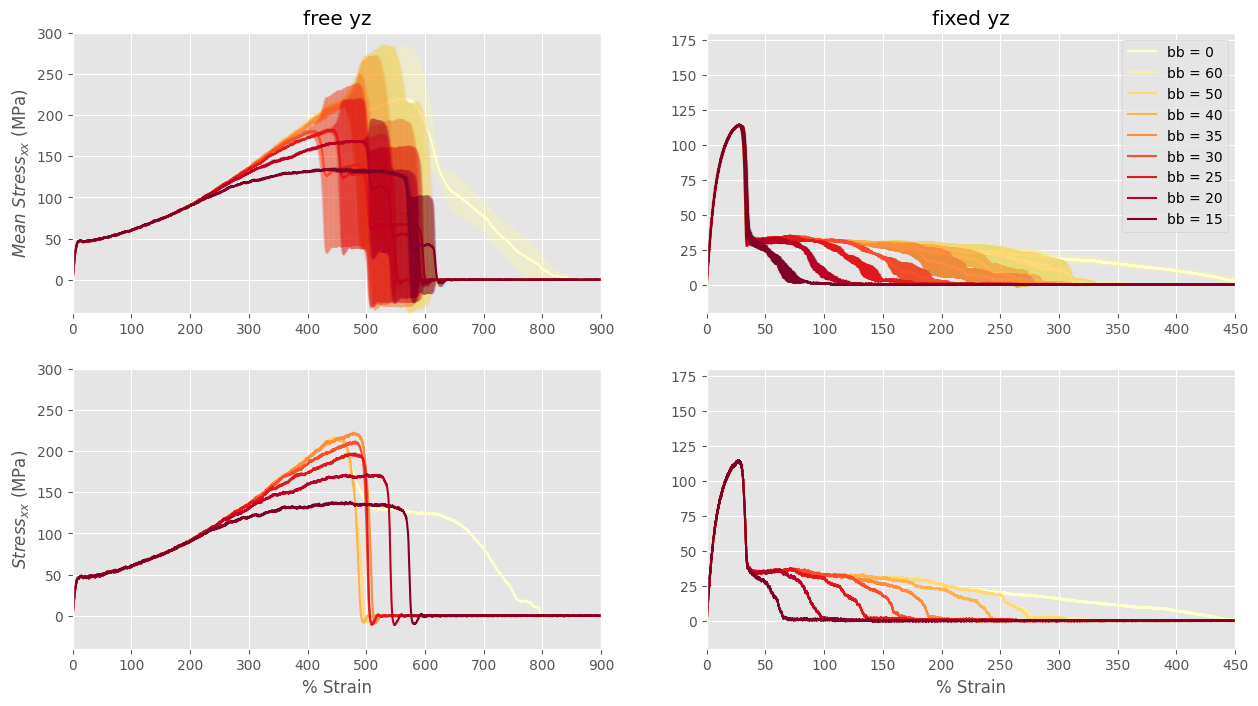

In [17]:
plt.style.use("ggplot")
fig, ax = plt.subplots(2, 2)
seed=2
fig.set_size_inches(15, 8)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part
ax[0,0].axis([0, 900, -40, 300])
ax[0,0].grid(True)

lines = {}
errors= {}

cl = 0
for bb in np.flip(bndbrkthresh):
    inflpt = np.gradient(meanstressld[bb][:, 1]).argmin()

    inflpt_i = inflpt - 80
    pty = meanstressld[bb][inflpt_i:inflpt, 1].max()
    maxindex = inflpt_i + meanstressld[bb][inflpt_i:inflpt, 1].argmax()
    ptx = meanstressld[bb][maxindex, 0]

    lines[bb, 0] = ax[0,0].plot(
        meanstressld[bb][:, 0],
        meanstressld[bb][:, 1],
        "-",
        label="bb = {bb}".format(bb=bb),
        color=colormap[cl],
    )

    errors[bb, 0] = ax[0,0].errorbar(
        meanstressld[bb][:, 0],
        meanstressld[bb][:, 1],
        yerr=errorstressld[bb][:,1],
        fmt='none',
        ecolor=colormap[cl],
        alpha=0.05
    )

    cl += 1

# ax[0,0].set_xlabel("% Strain")
ax[0,0].set_ylabel("$Mean$ $Stress_{xx}$ (MPa)")
# ax[0, 0].legend()
ax[0,0].set_title("free yz")

# YZconstant part
ax[0,1].axis([0, 450, -20, 180])
ax[0,1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[bb, 1] = ax[0,1].plot(
        meanstressyz[bb][:, 0],
        meanstressyz[bb][:, 1],
        "-",
        label="bb = {bb}".format(bb=bb),
        color=colormap[cl],
    )

    errors[bb, 1] = ax[0,1].errorbar(
        meanstressyz[bb][:, 0],
        meanstressyz[bb][:, 1],
        yerr=errorstressyz[bb][:,1],
        fmt='none',
        ecolor=colormap[cl],
        alpha=0.05
    )

    cl += 1

# ax[0,1].set_xlabel("% Strain")
#ax[0,1].set_ylabel("$Mean$ $Stress_{xx}$ (MPa)")
ax[0,1].legend()
ax[0,1].set_title("fixed yz")

##########################

ax[1,0].axis([0, 900, -40, 300])
ax[1,0].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    inflpt = np.gradient(stresstrainld[seed, bb][:, 1]).argmin()

    inflpt_i = inflpt - 80
    pty = stresstrainld[seed, bb][inflpt_i:inflpt, 1].max()
    maxindex = inflpt_i + stresstrainld[seed, bb][inflpt_i:inflpt, 1].argmax()
    ptx = stresstrainld[seed, bb][maxindex, 0]

    lines[bb, 0] = ax[1,0].plot(
        stresstrainld[seed, bb][:, 0],
        stresstrainld[seed, bb][:, 1],
        "-",
        label="bb = {bb}".format(s=seed, bb=bb),
        color=colormap[cl],
    )

    cl += 1

ax[1,0].set_xlabel("% Strain")
ax[1,0].set_ylabel("$Stress_{xx}$ (MPa)")
# ax[0, 0].legend()

# YZconstant part
ax[1,1].axis([0, 450, -20, 180])
ax[1,1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[bb, 1] = ax[1,1].plot(
        stresstrainyz[seed, bb][:, 0],
        stresstrainyz[seed, bb][:, 1],
        "-",
        label="bb = {bb}".format(s=seed, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[1,1].set_xlabel("% Strain")
ax[1,0].set_ylabel("$Stress_{xx}$ (MPa)")
# ax[1,1].legend()


plt.savefig("stress_plots.png")
plt.show()

NameError: name 'numbondsld' is not defined

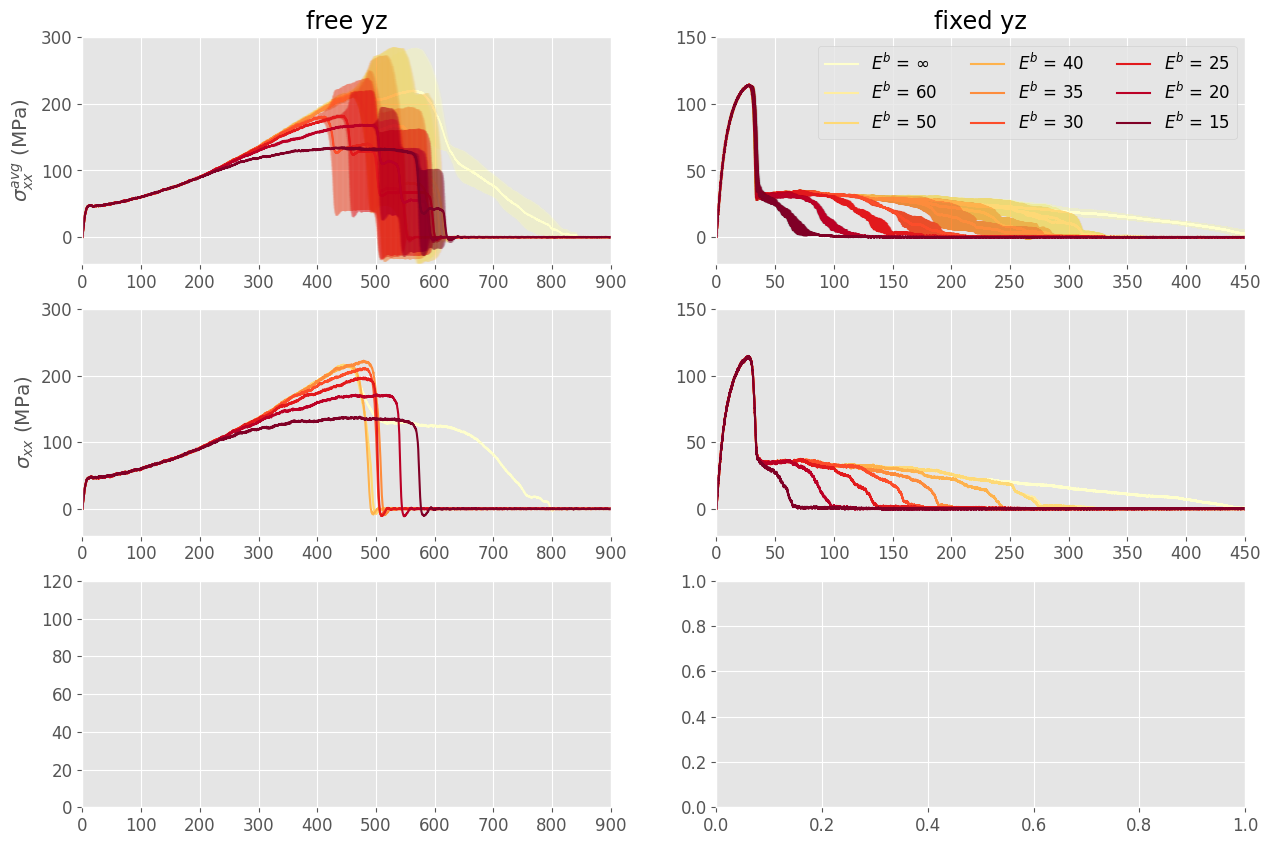

In [9]:
plt.style.use("ggplot")
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(3, 2)
seed=2
fig.set_size_inches(15, 10)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part
ax[0,0].axis([0, 900, -40, 300])
ax[0,0].grid(True)

lines = {}
errors= {}

cl = 0
for bb in np.flip(bndbrkthresh):
    inflpt = np.gradient(meanstressld[bb][:, 1]).argmin()

    inflpt_i = inflpt - 80
    pty = meanstressld[bb][inflpt_i:inflpt, 1].max()
    maxindex = inflpt_i + meanstressld[bb][inflpt_i:inflpt, 1].argmax()
    ptx = meanstressld[bb][maxindex, 0]

    lines[bb, 0] = ax[0,0].plot(
        meanstressld[bb][:, 0],
        meanstressld[bb][:, 1],
        "-",
        label="$E^b$ = {bb}".format(bb=bb),
        color=colormap[cl],
    )

    errors[bb, 0] = ax[0,0].errorbar(
        meanstressld[bb][:, 0],
        meanstressld[bb][:, 1],
        yerr=errorstressld[bb][:,1],
        fmt='none',
        ecolor=colormap[cl],
        alpha=0.05
    )

    cl += 1

# ax[0,0].set_xlabel("% Strain")
ax[0,0].set_ylabel("$\sigma^{avg}_{xx}$ (MPa)")
# ax[0, 0].legend()
ax[0,0].set_title("free yz")

# YZconstant part
ax[0,1].axis([0, 450, -20, 150])
ax[0,1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    if bb==0:
        lines[bb, 1] = ax[0,1].plot(
            meanstressyz[bb][:, 0],
            meanstressyz[bb][:, 1],
            "-",
            label="$E^b$ = $\infty$",
            color=colormap[cl],
        )
    else:
        lines[bb, 1] = ax[0,1].plot(
            meanstressyz[bb][:, 0],
            meanstressyz[bb][:, 1],
            "-",
            label="$E^b$ = {bb}".format(bb=bb),
            color=colormap[cl],
        )

    errors[bb, 1] = ax[0,1].errorbar(
        meanstressyz[bb][:, 0],
        meanstressyz[bb][:, 1],
        yerr=errorstressyz[bb][:,1],
        fmt='none',
        ecolor=colormap[cl],
        alpha=0.05
    )

    cl += 1

# ax[0,1].set_xlabel("% Strain")
#ax[0,1].set_ylabel("$Mean$ $Stress_{xx}$ (MPa)")
ax[0,1].legend(ncol=3)
ax[0,1].set_title("fixed yz")

##########################

ax[1,0].axis([0, 900, -40, 300])
ax[1,0].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    inflpt = np.gradient(stresstrainld[seed, bb][:, 1]).argmin()

    inflpt_i = inflpt - 80
    pty = stresstrainld[seed, bb][inflpt_i:inflpt, 1].max()
    maxindex = inflpt_i + stresstrainld[seed, bb][inflpt_i:inflpt, 1].argmax()
    ptx = stresstrainld[seed, bb][maxindex, 0]

    lines[bb, 0] = ax[1,0].plot(
        stresstrainld[seed, bb][:, 0],
        stresstrainld[seed, bb][:, 1],
        "-",
        label="bb = {bb}".format(s=seed, bb=bb),
        color=colormap[cl],
    )

    cl += 1

# ax[1,0].set_xlabel("% Strain")
ax[1,0].set_ylabel("$\sigma_{xx}$ (MPa)")
# ax[0, 0].legend()

# YZconstant part
ax[1,1].axis([0, 450, -20, 150])
ax[1,1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[bb, 1] = ax[1,1].plot(
        stresstrainyz[seed, bb][:, 0],
        stresstrainyz[seed, bb][:, 1],
        "-",
        label="bb = {bb}".format(s=seed, bb=bb),
        color=colormap[cl],
    )
    cl += 1

# ax[1,1].set_xlabel("% Strain")


# UniaxialTensile part
ax[2,0].axis([0, 900, 0, 120])
ax[2,0].grid(True)

lines = {}

cl = 0
s=seed
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[2,0].plot(
        numbondsld[s, bb][:, 0] * 2.5 / 10000,
        -(numbondsld[s, bb][:, 2] - numbondsld[s, bb][:, 2][0])/10,
        # yerr=rogldavg[s,bb][:, 2],
        label="numbonds_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[2,0].set_xlabel("% Strain")
ax[2,0].set_ylabel("(No. of broken bonds) / 10")
# ax[2,0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
# ax[0].legend()
# ax[0].set_title("UniaxialTensile")
# YZconstant part
ax[2,1].axis([0, 450, 0, 18])
ax[2,1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[2,1].errorbar(
        numbondsyz[s, bb][:, 0] * 2.5 / 10000,
        -(numbondsyz[s, bb][:, 2] - numbondsyz[s, bb][:, 2][0])/10,
        # yerr=rogyzavg[s,bb][:, 2],
        label="numbonds_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[2,1].set_xlabel("% Strain")


# plt.savefig("stress_plots.png")
plt.show()

### Number of Bonds for a specific seed

In [5]:
numbondsld = {}
numbondsyz = {}
for s in seeds:
    for bb in bndbrkthresh:
        numbondsldfile = "seed{s}/UniaxialTensile/ld{bb}/numbonds.dat".format(
            s=s, bb=bb
        )
        numbondsld[s, bb] = np.loadtxt(numbondsldfile)
        numbondsyzfile = "seed{s}/YZconstant/yz{bb}/numbonds.dat".format(s=s, bb=bb)
        numbondsyz[s, bb] = np.loadtxt(numbondsyzfile)

In [15]:
seed = 5

In [6]:
for bb in bndbrkthresh:
    print(bb,": ",numbondsyz[2,bb][:,2][0] - numbondsyz[2,bb][:,2][-1])

15 :  150.0
20 :  103.0
25 :  94.0
30 :  72.0
35 :  44.0
40 :  71.0
50 :  44.0
60 :  40.0
0 :  0.0


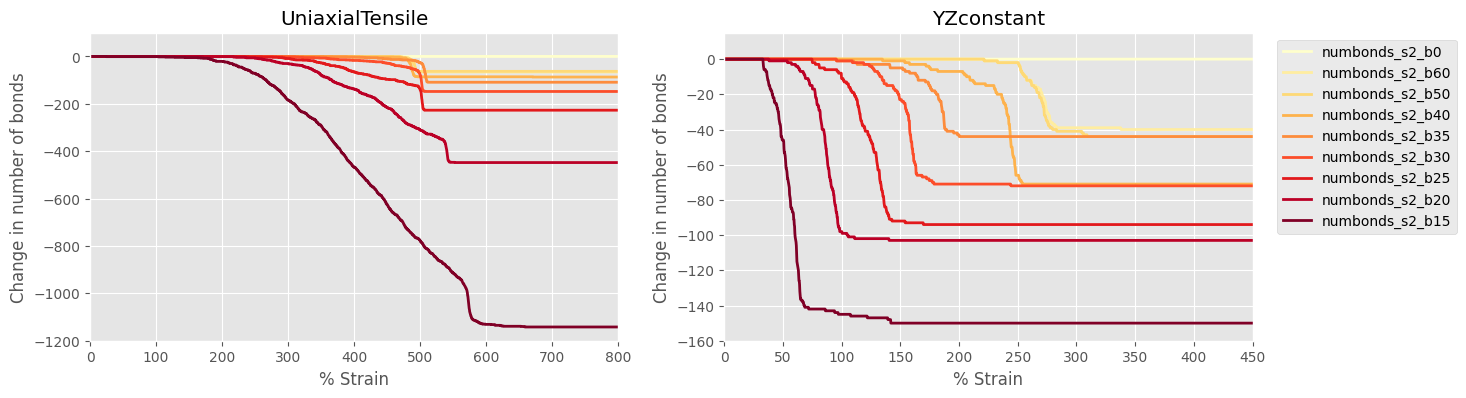

In [18]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 4)
s = 2
colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part
ax[0].axis([0, 800, -1200, 100])
ax[0].grid(True)

lines = {}

cl = 0

for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[0].plot(
        numbondsld[s, bb][:, 0] * 2.5 / 10000,
        numbondsld[s, bb][:, 2] - numbondsld[s, bb][:, 2][0],
        # yerr=rogldavg[s,bb][:, 2],
        label="numbonds_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[0].set_xlabel("% Strain")
ax[0].set_ylabel("Change in number of bonds")
# ax[0].legend()
ax[0].set_title("UniaxialTensile")

# YZconstant part
ax[1].axis([0, 450, -160, 15])
ax[1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[1].errorbar(
        numbondsyz[s, bb][:, 0] * 2.5 / 10000,
        numbondsyz[s, bb][:, 2] - numbondsyz[s, bb][:, 2][0],
        # yerr=rogyzavg[s,bb][:, 2],
        label="numbonds_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[1].set_xlabel("% Strain")
ax[1].set_ylabel("Change in number of bonds")
ax[1].legend(bbox_to_anchor=(1.4, 1), loc="upper right")
ax[1].set_title("YZconstant")

plt.show()

### Deviatory and  Volume split

In [4]:
def plot_curves_for_seed(seed,bndbrkthresh,data,col,axis):
    lines = {}
    cl = 0
    for bb in np.flip(bndbrkthresh):
        if bb==0:
            label="$\infty$"
        else:
            label=bb
        lines[seed, bb] = axis.plot(
            data[seed,bb][:, 0],
            data[seed,bb][:, col],
            "-",
            label="$E^b$ = {bb}".format(bb=label),
            color=colormap[cl],
        )
        cl += 1

def get_vol_part(data_s_bb):
    sxx = data_s_bb[:,1]
    syy = data_s_bb[:,2]
    szz = data_s_bb[:,3]
    s_vol_ii = (sxx+syy+szz)/3
    return s_vol_ii

def get_dev_part(data_s_bb,ii):
    sxx = data_s_bb[:,1]
    syy = data_s_bb[:,2]
    szz = data_s_bb[:,3]
    if ii=="xx":
        s_dev = (2*sxx-syy-szz)/3
    elif ii=="yy":
        s_dev = (2*syy-sxx-szz)/3
    elif ii=="zz":
        s_dev = (2*szz-sxx-syy)/3
    else:
        return
    return s_dev
    
    
def plot_curves_for_seed_vol(seed,bndbrkthresh,data,axis):
    lines = {}
    cl = 0
    for bb in np.flip(bndbrkthresh):
        lines[seed, bb] = axis.plot(
            data[seed,bb][:, 0],
            get_vol_part(data[seed,bb]),
            "-",
            label="$E^b$ = {bb}".format(bb=bb),
            color=colormap[cl],
        )
        cl += 1

def plot_curves_for_seed_dev(seed,bndbrkthresh,data,ii,axis):
    lines = {}
    cl = 0
    for bb in np.flip(bndbrkthresh):
        lines[seed, bb] = axis.plot(
            data[seed,bb][:, 0],
            get_dev_part(data[seed,bb],ii),
            "-",
            label="$E^b$ = {bb}".format(bb=bb),
            color=colormap[cl],
        )
        cl += 1

def plot_curves_for_seed_ratio(seed,bndbrkthresh,data,ii,axis):
    lines = {}
    cl = 0
    for bb in np.flip(bndbrkthresh):
        lines[seed, bb] = axis.plot(
            data[seed,bb][:, 0],
            np.divide(get_dev_part(data[seed,bb],ii),get_vol_part(data[seed,bb])),
            "-",
            label="$E^b$ = {bb}".format(bb=bb),
            color=colormap[cl],
        )
        cl += 1

In [18]:
((get_vol_part(stresstrainyz[2,0]),get_vol_part(stresstrainyz[4,0]))).shap

(20001,)

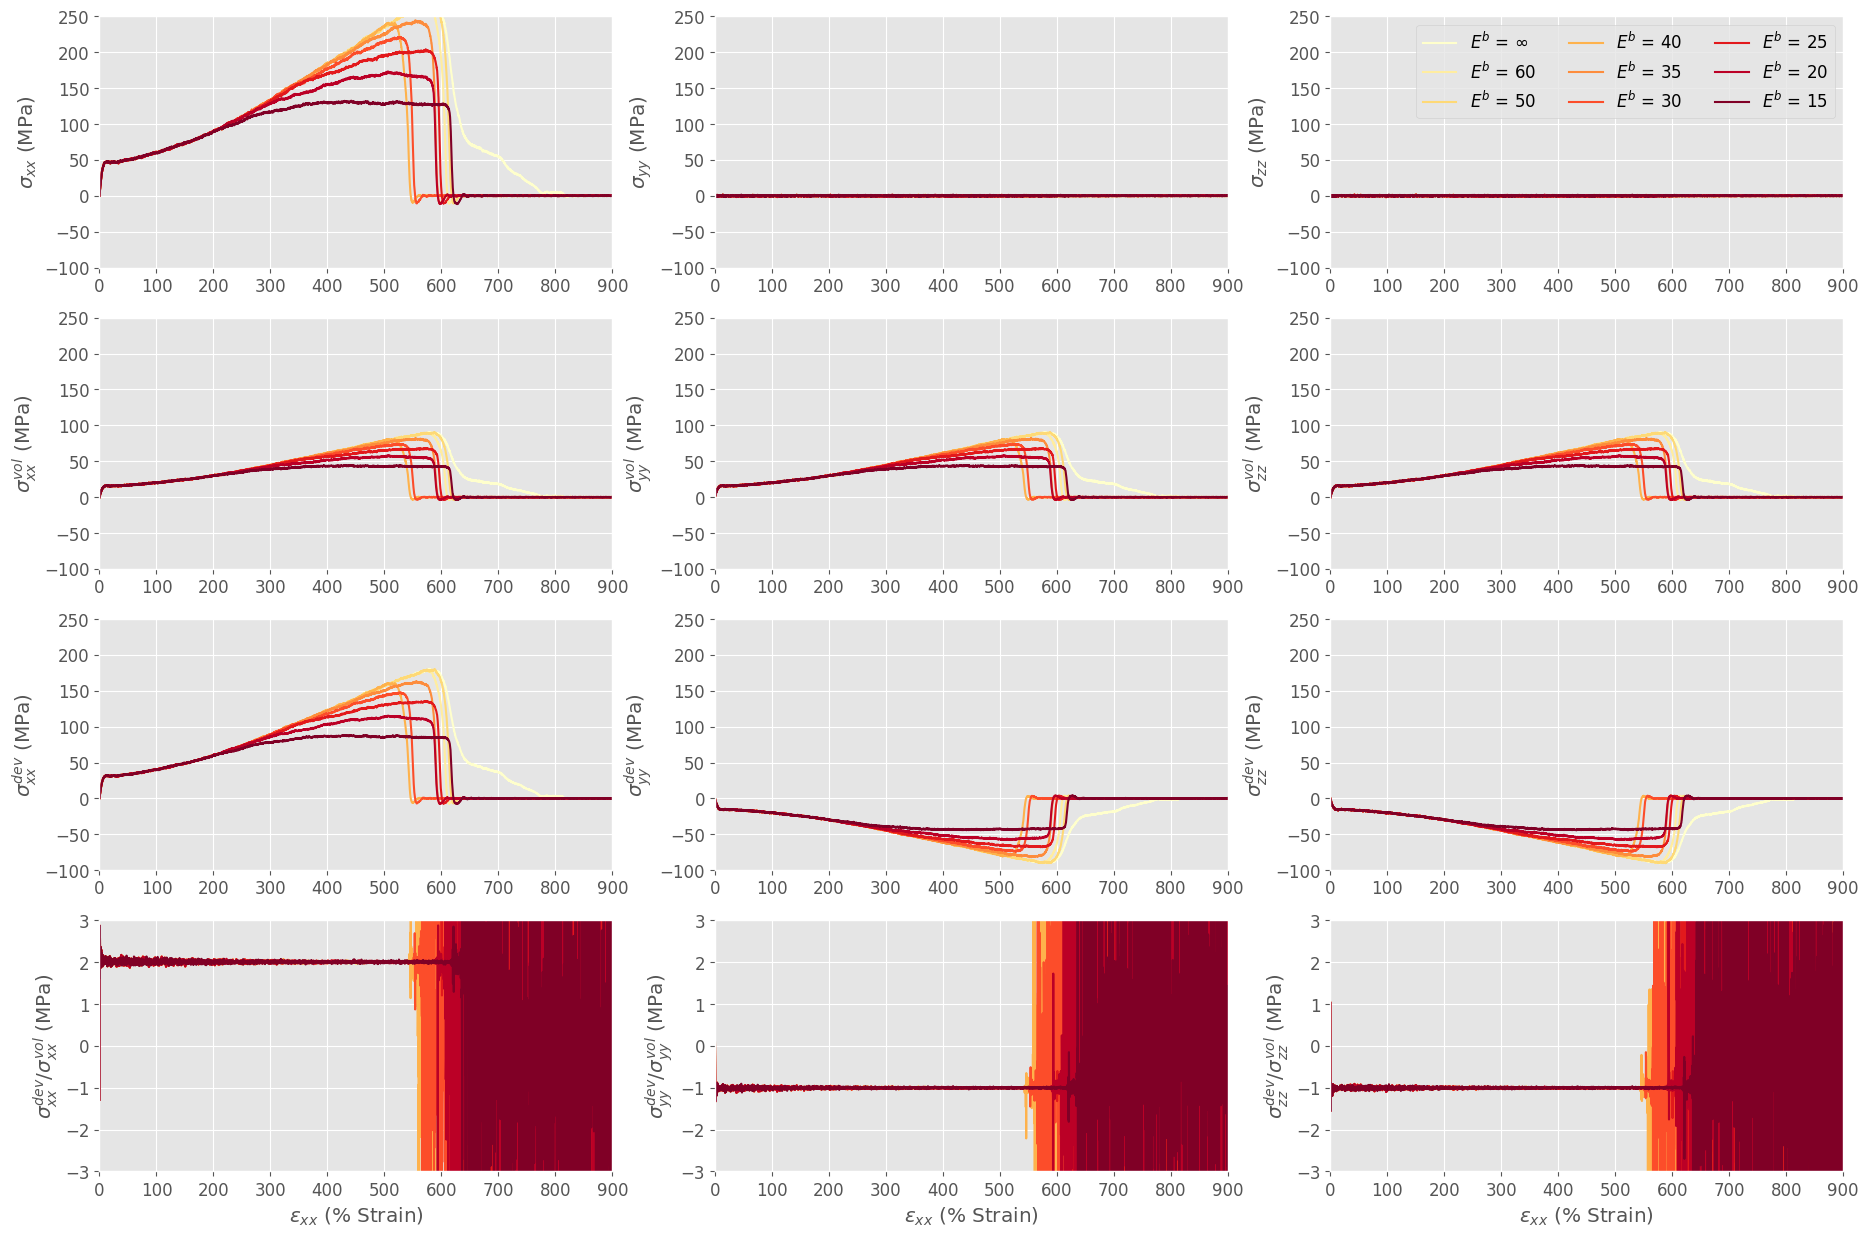

In [5]:
plt.style.use("ggplot")
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(4, 3)
seed=4
fig.set_size_inches(22.5, 15)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))
axbnd=[0,900,-100,250]
#########################

ax[0,0].axis(axbnd)
ax[0,0].grid(True)
ax[0,0].set_ylabel("$\sigma_{xx}$ (MPa)")
plot_curves_for_seed(seed,bndbrkthresh,stresstrainld,1,ax[0,0])

#######################

ax[0,1].axis(axbnd)
ax[0,1].grid(True)
ax[0,1].set_ylabel("$\sigma_{yy}$ (MPa)")
plot_curves_for_seed(seed,bndbrkthresh,stresstrainld,2,ax[0,1])

##########################

ax[0,2].axis(axbnd)
ax[0,2].grid(True)
ax[0,2].set_ylabel("$\sigma_{zz}$ (MPa)")
plot_curves_for_seed(seed,bndbrkthresh,stresstrainld,3,ax[0,2])
ax[0,2].legend(ncol=3)

#####################################


#####################################

ax[1,0].axis(axbnd)
ax[1,0].grid(True)
ax[1,0].set_ylabel("$\sigma^{vol}_{xx}$ (MPa)")
plot_curves_for_seed_vol(seed,bndbrkthresh,stresstrainld,ax[1,0])

##################################################

ax[1,1].axis(axbnd)
ax[1,1].grid(True)
ax[1,1].set_ylabel("$\sigma^{vol}_{yy}$ (MPa)")
plot_curves_for_seed_vol(seed,bndbrkthresh,stresstrainld,ax[1,1])

##################################################

ax[1,2].axis(axbnd)
ax[1,2].grid(True)
ax[1,2].set_ylabel("$\sigma^{vol}_{zz}$ (MPa)")
plot_curves_for_seed_vol(seed,bndbrkthresh,stresstrainld,ax[1,2])

#################################################


#####################################

ax[2,0].axis(axbnd)
ax[2,0].grid(True)
ax[2,0].set_ylabel("$\sigma^{dev}_{xx}$ (MPa)")
#ax[2,0].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_dev(seed,bndbrkthresh,stresstrainld,"xx",ax[2,0])

##################################################

ax[2,1].axis(axbnd)
ax[2,1].grid(True)
ax[2,1].set_ylabel("$\sigma^{dev}_{yy}$ (MPa)")
# ax[2,1].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_dev(seed,bndbrkthresh,stresstrainld,"yy",ax[2,1])

##################################################

ax[2,2].axis(axbnd)
ax[2,2].grid(True)
ax[2,2].set_ylabel("$\sigma^{dev}_{zz}$ (MPa)")
# ax[2,2].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_dev(seed,bndbrkthresh,stresstrainld,"zz",ax[2,2])

#################################################

#####################################
axrat=[0,900,-3,3]
ax[3,0].axis(axrat)
ax[3,0].grid(True)
ax[3,0].set_ylabel("$\sigma^{dev}_{xx}/\sigma^{vol}_{xx}$ (MPa)")
ax[3,0].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_ratio(seed,bndbrkthresh,stresstrainld,"xx",ax[3,0])

##################################################

ax[3,1].axis(axrat)
ax[3,1].grid(True)
ax[3,1].set_ylabel("$\sigma^{dev}_{yy}/\sigma^{vol}_{yy}$ (MPa)")
ax[3,1].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_ratio(seed,bndbrkthresh,stresstrainld,"yy",ax[3,1])

##################################################

ax[3,2].axis(axrat)
ax[3,2].grid(True)
ax[3,2].set_ylabel("$\sigma^{dev}_{zz}/\sigma^{vol}_{zz}$ (MPa)")
ax[3,2].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_ratio(seed,bndbrkthresh,stresstrainld,"zz",ax[3,2])

#################################################


# plt.savefig("stress_vol_dev_plots_free_yz.png")
plt.show()

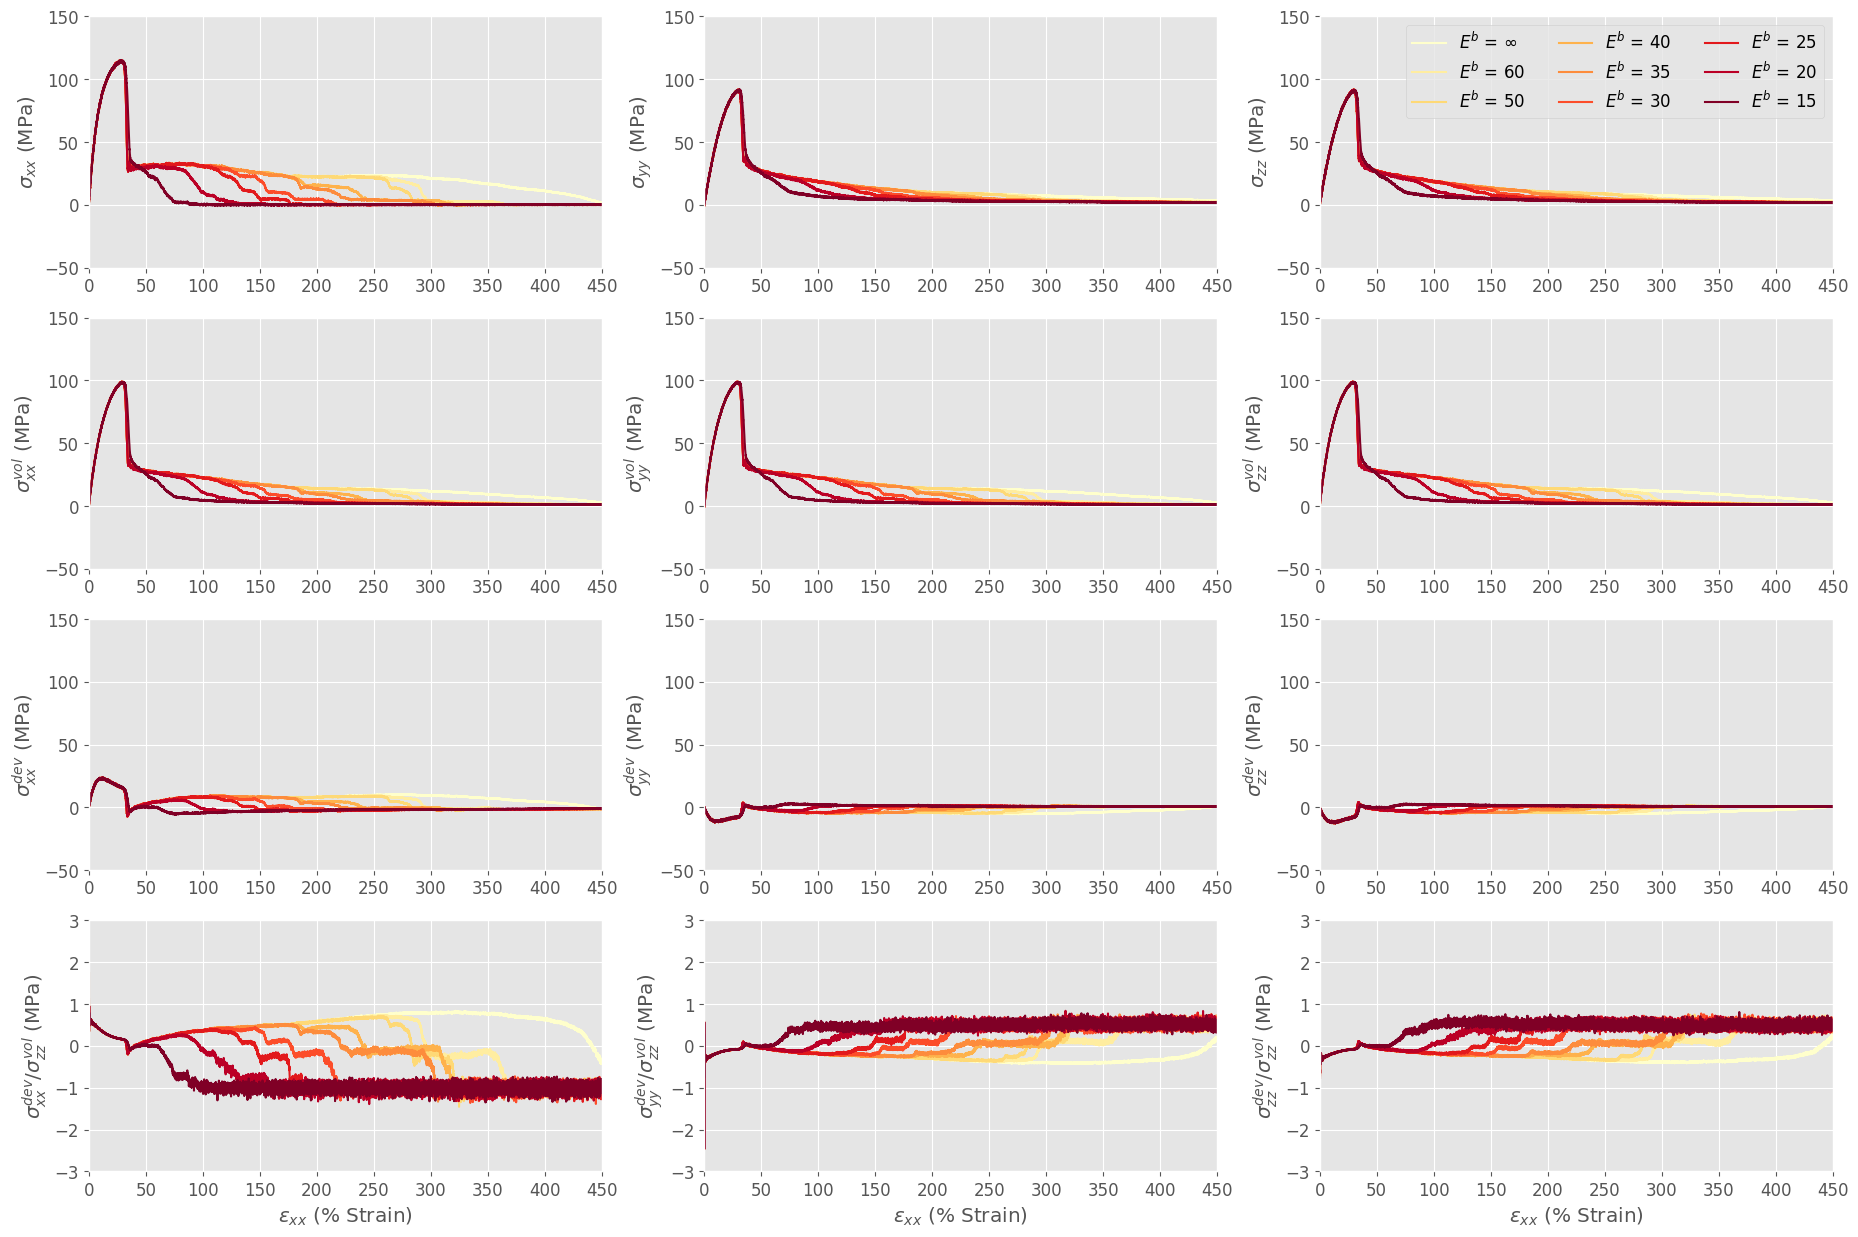

In [7]:
plt.style.use("ggplot")
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(4, 3)
seed=4
fig.set_size_inches(22.5, 15)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))
axbnd=[0,450,-50,150]
#########################

ax[0,0].axis(axbnd)
ax[0,0].grid(True)
ax[0,0].set_ylabel("$\sigma_{xx}$ (MPa)")
plot_curves_for_seed(seed,bndbrkthresh,stresstrainyz,1,ax[0,0])

#######################

ax[0,1].axis(axbnd)
ax[0,1].grid(True)
ax[0,1].set_ylabel("$\sigma_{yy}$ (MPa)")
plot_curves_for_seed(seed,bndbrkthresh,stresstrainyz,2,ax[0,1])

##########################

ax[0,2].axis(axbnd)
ax[0,2].grid(True)
ax[0,2].set_ylabel("$\sigma_{zz}$ (MPa)")
plot_curves_for_seed(seed,bndbrkthresh,stresstrainyz,3,ax[0,2])
ax[0,2].legend(ncol=3)

#####################################


#####################################

ax[1,0].axis(axbnd)
ax[1,0].grid(True)
ax[1,0].set_ylabel("$\sigma^{vol}_{xx}$ (MPa)")
plot_curves_for_seed_vol(seed,bndbrkthresh,stresstrainyz,ax[1,0])

##################################################

ax[1,1].axis(axbnd)
ax[1,1].grid(True)
ax[1,1].set_ylabel("$\sigma^{vol}_{yy}$ (MPa)")
plot_curves_for_seed_vol(seed,bndbrkthresh,stresstrainyz,ax[1,1])

##################################################

ax[1,2].axis(axbnd)
ax[1,2].grid(True)
ax[1,2].set_ylabel("$\sigma^{vol}_{zz}$ (MPa)")
plot_curves_for_seed_vol(seed,bndbrkthresh,stresstrainyz,ax[1,2])

#################################################


#####################################

ax[2,0].axis(axbnd)
ax[2,0].grid(True)
ax[2,0].set_ylabel("$\sigma^{dev}_{xx}$ (MPa)")
# ax[2,0].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_dev(seed,bndbrkthresh,stresstrainyz,"xx",ax[2,0])

##################################################

ax[2,1].axis(axbnd)
ax[2,1].grid(True)
ax[2,1].set_ylabel("$\sigma^{dev}_{yy}$ (MPa)")
# ax[2,1].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_dev(seed,bndbrkthresh,stresstrainyz,"yy",ax[2,1])

##################################################

ax[2,2].axis(axbnd)
ax[2,2].grid(True)
ax[2,2].set_ylabel("$\sigma^{dev}_{zz}$ (MPa)")
# ax[2,2].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_dev(seed,bndbrkthresh,stresstrainyz,"zz",ax[2,2])

#################################################

#####################################
axrat=[0,450,-3,3]
ax[3,0].axis(axrat)
ax[3,0].grid(True)
ax[3,0].set_ylabel("$\sigma^{dev}_{xx} / \sigma^{vol}_{zz}$ (MPa)")
ax[3,0].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_ratio(seed,bndbrkthresh,stresstrainyz,"xx",ax[3,0])

##################################################

ax[3,1].axis(axrat)
ax[3,1].grid(True)
ax[3,1].set_ylabel("$\sigma^{dev}_{yy} / \sigma^{vol}_{zz}$ (MPa)")
ax[3,1].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_ratio(seed,bndbrkthresh,stresstrainyz,"yy",ax[3,1])

##################################################

ax[3,2].axis(axrat)
ax[3,2].grid(True)
ax[3,2].set_ylabel("$\sigma^{dev}_{zz} / \sigma^{vol}_{zz}$ (MPa)")
ax[3,2].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_ratio(seed,bndbrkthresh,stresstrainyz,"zz",ax[3,2])
#################################################

plt.savefig("stress_vol_dev_plots_fixed_yz.png")
plt.show()

### Equivalent stress von misses

In [95]:
def get_vonmisses(data_s_bb):
    sxx = data_s_bb[:,1]
    syy = data_s_bb[:,2]
    szz = data_s_bb[:,3]
    s_vm = np.sqrt( (0.5) * ( (sxx-syy)**2 + (syy-szz)**2 + (szz-sxx)**2 ) )
    return s_vm

def plot_curves_for_seed_VM(seed,bndbrkthresh,data,axis):
    lines = {}
    cl = 0
    for bb in np.flip(bndbrkthresh):
        lines[seed, bb] = axis.plot(
            data[seed,bb][:, 0],
            get_vonmisses(data[seed,bb]),
            "-",
            label="$E^b$ = {bb}".format(bb=bb),
            color=colormap[cl],
        )
        cl += 1

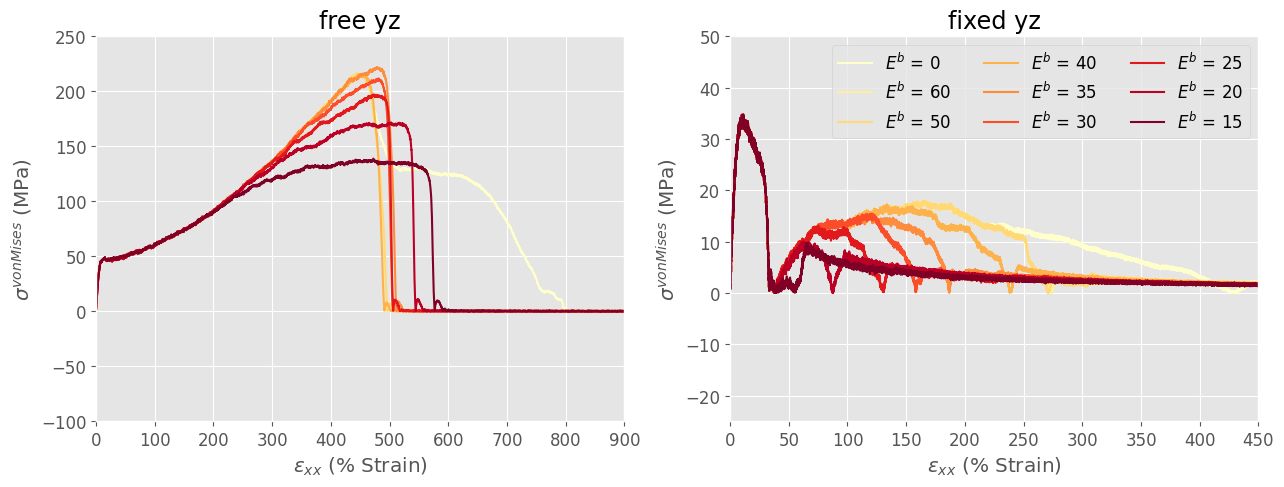

In [96]:
plt.style.use("ggplot")
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(1, 2)
seed=2
fig.set_size_inches(15, 5)
colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

##############################

ax[0].axis([0,900,-100,250])
ax[0].grid(True)
ax[0].set_ylabel("$\sigma^{vonMises}$ (MPa)")
ax[0].set_title("free yz")
ax[0].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_VM(seed,bndbrkthresh,stresstrainld,ax[0])

##############################

ax[1].axis([0,450,-25,50])
ax[1].grid(True)
ax[1].set_ylabel("$\sigma^{vonMises}$ (MPa)")
ax[1].set_title("fixed yz")
ax[1].set_xlabel("$\epsilon_{xx}$ (% Strain)")
plot_curves_for_seed_VM(seed,bndbrkthresh,stresstrainyz,ax[1])
ax[1].legend(ncol=3)

plt.savefig("stress_vonMises_plots_both.png")
plt.show()


### VACF for the polymer chains of different seeds

In [ ]:
vacfdata = {}
vacfseeds = [1,2, 3, 4, 5]
for s in vacfseeds:
    vacffile = "seed{}/vacf.dat".format(s)
    vacfdata[s] = np.loadtxt(vacffile, skiprows=1)
    vacfdata[s][:, 0] = vacfdata[s][:, 0] - vacfdata[s][:, 0][0]
    vacfdata[s][:, 1] = vacfdata[s][:, 1] / vacfdata[s][:, 1][0]
    vacfdata[s][:, 0] = vacfdata[s][:, 0] * 5 / 1000


plt.style.use("ggplot")
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(8, 5)

colormap = plt.cm.Dark2(np.linspace(0, 1, len(vacfseeds)))

ax.axis([0, 5, -0.3, 1.1])
ax.grid(True)

lines = {}

cl = 0
for s in vacfseeds:
    lines[s] = ax.plot(
        vacfdata[s][:, 0],
        vacfdata[s][:, 1],
        "-",
        label="seed {s}".format(s=s-1),
        color=colormap[-cl-1],
    )
    cl += 1
    
ax.vlines(x=2.5,ymin=-0.2,ymax=0.2,linestyle="--",color="black")

ax.set_xlabel("Time (ps)")
ax.set_ylabel("Normalised VACF")
ax.legend()
xticks = np.arange(0, 5, 0.5)
ax.set_xticks(xticks)
plt.savefig("md_vacf.pdf")
# ax.set_title("VACF")

### ROG

In [12]:
def load_rog(file):
    vals = []
    tsdata = []

    num_mols = int(np.loadtxt(file, max_rows=1)[1])

    fileend_bytes = subprocess.check_output(
        "tail -{n} {f}".format(n=num_mols + 1, f=file), shell=True
    )
    fileend_str = io.StringIO(fileend_bytes.decode())

    num_ts = int(np.loadtxt(fileend_str, max_rows=1)[0])

    ts = np.arange(1000, num_ts + 1000, 10000)

    for i, t in enumerate(ts):
        top = 3 + 1 * (i + 1) + i * num_mols
        data = np.loadtxt(file, skiprows=top, max_rows=num_mols)
        tsdata.append(data)
        val = np.hstack((t, np.average(data[:, 1]), np.std(data[:, 1])))
        vals.append(val)
    vals = np.vstack(vals)
    return vals, tsdata

In [13]:
# rogld = {}
# rogyz = {}
# rogldavg = {}
# rogyzavg = {}
# for s in seeds:
#     print("reading for seed ", s)
#     for bb in bndbrkthresh:
#         print("reading for bb ", bb)
#         rogldfile = "seed{s}/UniaxialTensile/ld{bb}/rog.dat".format(s=s, bb=bb)
#         rogldavg[s, bb], rogld[s, bb] = load_rog(rogldfile)

#         rogyzfile = "seed{s}/YZconstant/yz{bb}/rog.dat".format(s=s, bb=bb)
#         rogyzavg[s, bb], rogyz[s, bb] = load_rog(rogyzfile)

In [14]:
# plt.style.use("ggplot")
# fig, ax = plt.subplots(1, 2)
# seeds = [2]
# fig.set_size_inches(15, 5)

# colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# # UniaxialTensile part
# ax[0].axis([0, 800, 25, 35])
# ax[0].grid(True)

# lines = {}

# cl = 0
# for s in seeds:
#     for bb in np.flip(bndbrkthresh):
#         lines[s, bb] = ax[0].plot(
#             rogldavg[s, bb][:, 0] * 2.5 / 10000,
#             rogldavg[s, bb][:, 1],
#             # yerr=rogldavg[s,bb][:, 2],
#             label="ROG_avg_s{s}_b{bb}".format(s=s, bb=bb),
#             color=colormap[cl],
#         )
#         cl += 1

# ax[0].set_xlabel("% Strain")
# ax[0].set_ylabel("ROG_avg (Ang)")
# ax[0].legend()
# ax[0].set_title("UniaxialTensile")

# # YZconstant part
# ax[1].axis([0, 450, 20, 35])
# ax[1].grid(True)

# lines = {}

# cl = 0
# for s in seeds:
#     for bb in np.flip(bndbrkthresh):
#         lines[s, bb] = ax[1].errorbar(
#             rogyzavg[s, bb][:, 0] * 2.5 / 10000,
#             rogyzavg[s, bb][:, 1],
#             # yerr=rogyzavg[s,bb][:, 2],
#             label="ROG_avg_s{s}_b{bb}".format(s=s, bb=bb),
#             color=colormap[cl],
#         )
#         cl += 1

# ax[1].set_xlabel("% Strain")
# ax[1].set_ylabel("ROG_avg (Ang)")
# ax[1].legend()
# ax[1].set_title("YZconstant")

# plt.show()

In [15]:
# rogseeds = [2]

# plt.style.use("ggplot")
# fig, ax = plt.subplots(1, 2)

# fig.set_size_inches(15, 5)

# colormap = plt.cm.plasma(np.linspace(0, 1, len(rogseeds)))

# # UniaxialTensile part
# ax[0].axis([0, 500, 0, 100])
# ax[0].grid(True)

# lines = {}

# cl = 0
# for s in rogseeds:
#     lines[s] = ax[0].scatter(
#         rogld[s, 0][0][:, 0],
#         rogld[s, 0][0][:, 1],
#         label="ROG dist s{s} bb{bb}".format(s=s, bb=bb),
#         color=colormap[cl],
#     )
#     cl += 1

# ax[0].set_xlabel("Molecule ID")
# ax[0].set_ylabel("ROG (Ang)")
# ax[0].legend()
# ax[0].set_title("0% Strain")

# # YZconstant part
# ax[1].axis([0, 500, 0, 100])
# ax[1].grid(True)

# lines = {}

# cl = 0
# for s in rogseeds:
#     lines[s] = ax[1].scatter(
#         rogld[s, 0][180][:, 0],
#         rogld[s, 0][180][:, 1],
#         label="ROG dist s{s} bb{bb}".format(s=s, bb=bb),
#         color=colormap[cl],
#     )
#     cl += 1

# ax[1].set_xlabel("Molecule ID")
# ax[1].set_ylabel("ROG (Ang)")
# ax[1].legend()
# ax[1].set_title("800% Strain")

# plt.show()

### MSD

In [16]:
# def load_com(file):
#     vals = []
#     molcom = {}

#     num_mols = int(np.loadtxt(file, max_rows=1)[1])

#     fileend_bytes = subprocess.check_output(
#         "tail -{n} {f}".format(n=num_mols + 1, f=file), shell=True
#     )
#     fileend_str = io.StringIO(fileend_bytes.decode())

#     num_ts = int(np.loadtxt(fileend_str, max_rows=1)[0])

#     ts = np.arange(1000, 3600000 + 10000, 10000)

#     for molid in range(1, num_mols + 1):
#         molcom[molid] = []

#     for i, t in enumerate(ts):
#         top = 3 + 1 * (i + 1) + i * num_mols
#         data = np.loadtxt(file, skiprows=top, max_rows=num_mols)
#         for molid in range(1, num_mols + 1):
#             moldata = np.hstack((t, data[np.where(data[:, 0] == molid)].flatten()))
#             molcom[molid].append(moldata)
#     for molid in range(1, num_mols + 1):
#         molcom[molid] = np.vstack(molcom[molid])
#         # tsdata.append(data)
#         # val = np.hstack((t, np.average(data[:, 1]), np.std(data[:, 1])))
#         # vals.append(val)
#     # vals = np.vstack(vals)
#     # i=0
#     # top = 3 + 1 * (i + 1) + i * num_mols
#     # data = np.loadtxt(file, skiprows=top, max_rows=num_mols)
#     return molcom

In [17]:
# def msd_avg(molcom):
#     num_mols = len(molcom.keys())
#     num_ts = molcom[1][:,0][-1]
#     sd_avg = []
#     for i,t in enumerate(np.arange(1000, num_ts+10000, 10000)):
#         sd_sum = 0
#         for molid in range(1,num_mols+1):
#             sqdisp = np.square(molcom[molid][i,2:] - molcom[molid][0,2:])
#             sd_sum += sqdisp
#         avg = sd_sum/num_mols
#         for molid in range(1,num_mols+1):
#             stddev = np.sqrt(np.sum(np.square(molcom[molid][i,2:] - molcom[molid][0,2:]) - avg, axis=0)/num_mols)
#         data = np.hstack((t,avg,stddev))
#         sd_avg.append(data)
#         sdavg = np.vstack(sd_avg)
#     return sdavg

In [18]:
# msdldavg = {}
# msdyzavg = {}
# for s in seeds:
#     print("reading for seed ", s)
#     for bb in bndbrkthresh:
#         print("reading for bb ", bb)
#         ldfile = "seed{s}/UniaxialTensile/ld{bb}/com.dat".format(s=s, bb=bb)
#         msdldavg[s, bb] = msd_avg(load_com(ldfile))

#         yzfile = "seed{s}/YZconstant/yz{bb}/com.dat".format(s=s, bb=bb)
#         msdyzavg[s, bb] = msd_avg(load_com(yzfile))

In [19]:
# fig = plt.figure()
# ax = fig.add_subplot()


# ax.plot(a[:,0] * 2.5/10000,a[:,1:]*0.01,label=["X","Y","Z"])
# ax.set_xlabel("% Strain")
# ax.set_ylabel("MSD nm^2")
# ax.set_xlim([0,900])
# ax.legend()

# plt.show()

In [20]:
# plt.style.use("ggplot")
# fig, ax = plt.subplots(1, 2)
# fig.set_size_inches(15, 5)
# s = 2
# colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# # UniaxialTensile part
# # ax[0].axis([0, 800, -1100, 100])
# ax[0].grid(True)

# lines = {}

# cl = 0

# for bb in np.flip(bndbrkthresh):
#     lines[s, bb] = ax[0].plot(
#         msdldavg[s, bb][:, 0] * 2.5 / 10000,
#         msdldavg[s, bb][:, 1],
#         # yerr=rogldavg[s,bb][:, 2],
#         label="MSD_s{s}_b{bb}".format(s=s, bb=bb),
#         color=colormap[cl],
#         linewidth=2,
#     )
#     cl += 1

# ax[0].set_xlabel("% Strain")
# ax[0].set_ylabel("MSD A^2")
# # ax[0].legend()
# ax[0].set_title("UniaxialTensile")

# # YZconstant part
# ax[1].axis([0, 450, 0, 10000])
# ax[1].grid(True)

# lines = {}

# cl = 0
# for bb in np.flip(bndbrkthresh):
#     lines[s, bb] = ax[1].errorbar(
#         msdyzavg[s, bb][:, 0] * 2.5 / 10000,
#         msdyzavg[s, bb][:, 1],
#         # yerr=rogyzavg[s,bb][:, 2],
#         label="MSD_s{s}_b{bb}".format(s=s, bb=bb),
#         color=colormap[cl],
#         linewidth=2,
#     )
#     cl += 1

# ax[1].set_xlabel("% Strain")
# ax[1].set_ylabel("MSD A^2")
# ax[1].legend(bbox_to_anchor=(1.4, 1), loc="upper right")
# ax[1].set_title("YZconstant")

# plt.show()

### Energies

In [21]:
energiesld = {}
energiesyz = {}
for s in seeds:
    for bb in bndbrkthresh:
        energiesldfile = "seed{s}/UniaxialTensile/ld{bb}/energies.dat".format(
            s=s, bb=bb
        )
        energiesld[s, bb] = np.loadtxt(energiesldfile)
        energiesyzfile = "seed{s}/YZconstant/yz{bb}/energies.dat".format(s=s, bb=bb)
        energiesyz[s, bb] = np.loadtxt(energiesyzfile)

In [22]:
s = 2

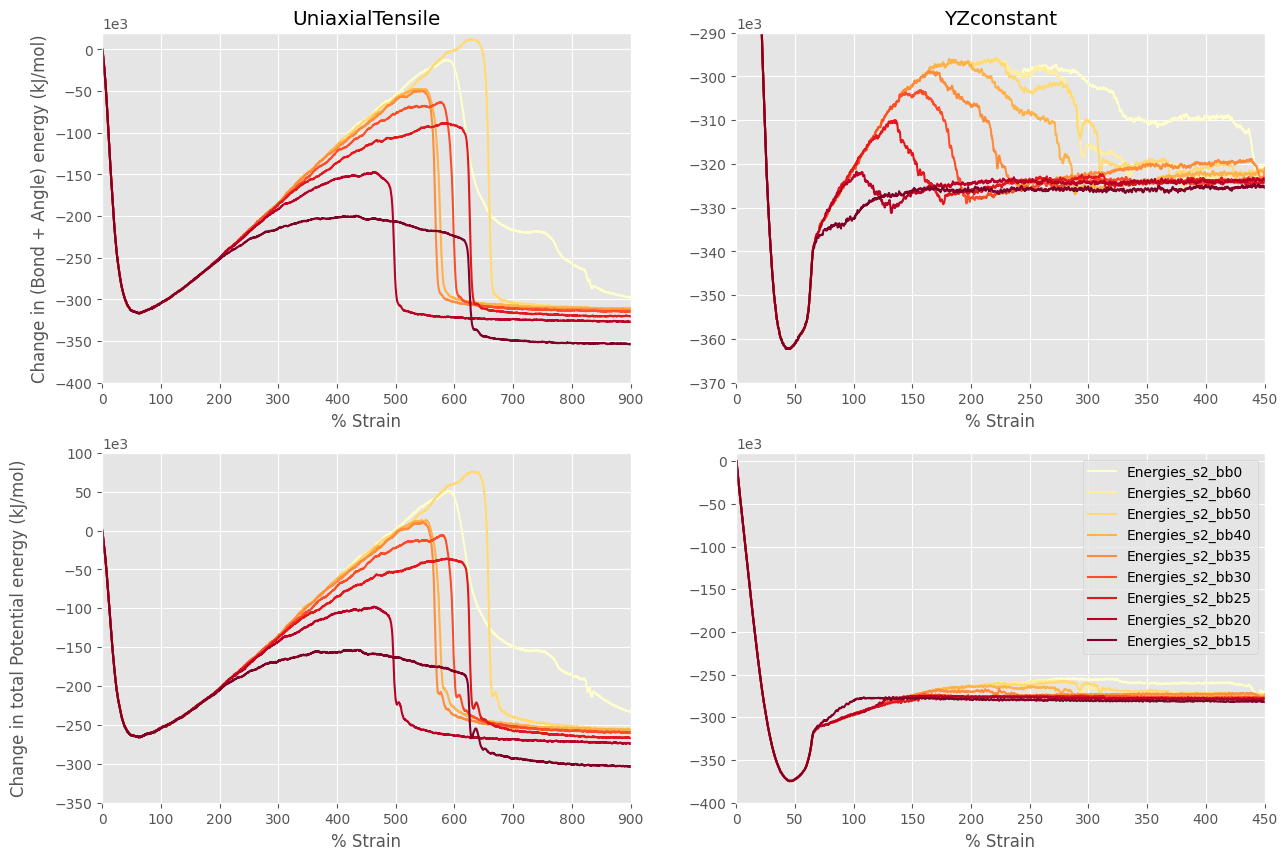

In [23]:
plt.style.use("ggplot")
fig, ax = plt.subplots(2, 2)

fig.set_size_inches(15, 10)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part#####################################
ax[0, 0].axis([0, 900, -400000, 20000])
ax[0, 0].grid(True)
ax[1, 0].axis([0, 900, -350000, 100000])
ax[1, 0].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[0, 0].plot(
        energiesld[s, bb][:, 0] * 2.5 / 10000,
        (
            (energiesld[s, bb][:, 2] + energiesld[s, bb][:, 3])
            - ((energiesld[s, bb][:, 2][0] + energiesld[s, bb][:, 3])[0])
        )
        * 4.184,
        "-",
        label="Bond+Angle_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[0, 0].set_xlabel("% Strain")
ax[0, 0].set_ylabel("Change in (Bond + Angle) energy (kJ/mol)")
# ax[0,0].legend()
ax[0, 0].set_title("UniaxialTensile")
ax[0, 0].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))

#########################################################


lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[1, 0].plot(
        energiesld[s, bb][:, 0] * 2.5 / 10000,
        (
            np.sum(energiesld[s, bb][:, 1:], axis=1)
            - np.sum(energiesld[s, bb][:, 1:], axis=1)[0]
        )
        * 4.184,
        "-",
        label="Total_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[1, 0].set_xlabel("% Strain")
ax[1, 0].set_ylabel("Change in total Potential energy (kJ/mol)", labelpad=19)
# ax[1,0].legend()
# ax[1,0].set_title("UniaxialTensile")
ax[1, 0].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))


# YZconstant part########################################
ax[0, 1].axis([0, 450, -370000, -290000])
ax[0, 1].grid(True)
ax[1, 1].axis([0, 450, -400000, 10000])
ax[1, 1].grid(True)


lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[0, 1].plot(
        energiesyz[s, bb][:, 0] * 2.5 / 10000,
        (
            (energiesyz[s, bb][:, 2] + energiesyz[s, bb][:, 3])
            - ((energiesyz[s, bb][:, 2][0] + energiesyz[s, bb][:, 3])[0])
        )
        * 4.184,
        "-",
        label="Energies_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[0, 1].set_xlabel("% Strain")
# ax[0,1].set_ylabel("Change in (Bond + Angle) energy (kJ/mol)")
# ax[0,1].legend()
ax[0, 1].set_title("YZconstant")
ax[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))

###################################################################

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[1, 1].plot(
        energiesyz[s, bb][:, 0] * 2.5 / 10000,
        (
            np.sum(energiesyz[s, bb][:, 1:], axis=1)
            - np.sum(energiesyz[s, bb][:, 1:], axis=1)[0]
        )
        * 4.184,
        "-",
        label="Energies_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[1, 1].set_xlabel("% Strain")
# ax[1,1].set_ylabel("Change in (Bond + Angle) energy (kJ/mol)")
ax[1, 1].legend()
# ax[1,1].set_title("YZconstant")
ax[1, 1].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))

################################################
plt.savefig("energies_s{}.pdf".format(s))

plt.show()

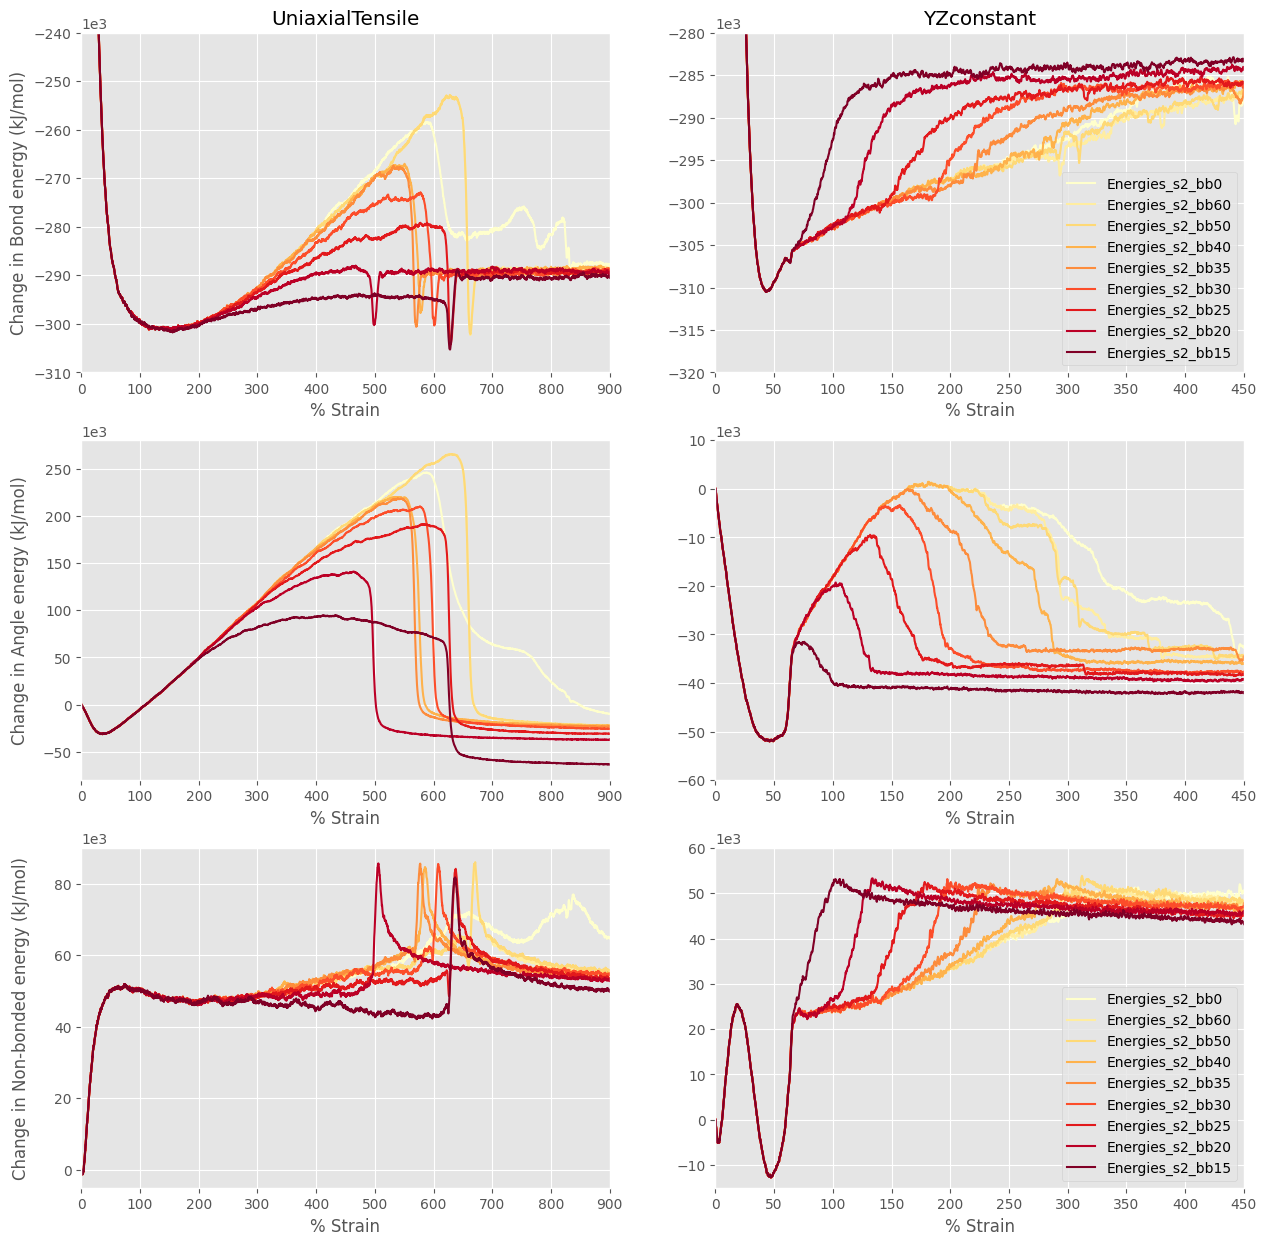

In [24]:
plt.style.use("ggplot")
fig, ax = plt.subplots(3, 2)

fig.set_size_inches(15, 15)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part#####################################
ax[0, 0].axis([0, 900, -310000, -240000])
ax[0, 0].grid(True)
ax[1, 0].axis([0, 900, -80000, 280000])
ax[1, 0].grid(True)
ax[2, 0].axis([0, 900, -5000, 90000])
ax[2, 0].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[0, 0].plot(
        energiesld[s, bb][:, 0] * 2.5 / 10000,
        (energiesld[s, bb][:, 2] - energiesld[s, bb][:, 2][0]) * 4.184,
        "-",
        label="Bond_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[0, 0].set_xlabel("% Strain")
ax[0, 0].set_ylabel("Change in Bond energy (kJ/mol)")
# ax[0,0].legend()
ax[0, 0].set_title("UniaxialTensile")
ax[0, 0].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))

#########################################################


lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[1, 0].plot(
        energiesld[s, bb][:, 0] * 2.5 / 10000,
        (energiesld[s, bb][:, 3] - energiesld[s, bb][:, 3][0]) * 4.184,
        "-",
        label="Pair_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[1, 0].set_xlabel("% Strain")
ax[1, 0].set_ylabel("Change in Angle energy (kJ/mol)", labelpad=10)
# ax[1,0].legend()
# ax[1,0].set_title("UniaxialTensile")
ax[1, 0].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))


###############################################################
lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[2, 0].plot(
        energiesld[s, bb][:, 0] * 2.5 / 10000,
        (energiesld[s, bb][:, 1] - energiesld[s, bb][:, 1][0]) * 4.184,
        "-",
        label="Pair_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[2, 0].set_xlabel("% Strain")
ax[2, 0].set_ylabel("Change in Non-bonded energy (kJ/mol)", labelpad=17)
# ax[1,0].legend()
# ax[1,0].set_title("UniaxialTensile")
ax[2, 0].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))


# YZconstant part########################################
ax[0, 1].axis([0, 450, -320000, -280000])
ax[0, 1].grid(True)
ax[1, 1].axis([0, 450, -60000, 10000])
ax[1, 1].grid(True)
ax[2, 1].axis([0, 450, -15000, 60000])
ax[2, 1].grid(True)


lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[0, 1].plot(
        energiesyz[s, bb][:, 0] * 2.5 / 10000,
        (energiesyz[s, bb][:, 2] - energiesyz[s, bb][:, 2][0]) * 4.184,
        "-",
        label="Energies_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[0, 1].set_xlabel("% Strain")
# ax[0,1].set_ylabel("Change in (Bond + Angle) energy (kJ/mol)")
ax[0, 1].legend()
ax[0, 1].set_title("YZconstant")
ax[0, 1].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))

###################################################################

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[1, 1].plot(
        energiesyz[s, bb][:, 0] * 2.5 / 10000,
        (energiesyz[s, bb][:, 3] - energiesyz[s, bb][:, 3][0]) * 4.184,
        "-",
        label="Pair_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[1, 1].set_xlabel("% Strain")
# ax[0,1].set_ylabel("Change in (Bond + Angle) energy (kJ/mol)")
# ax[0,1].legend()
# ax[1,1].set_title("YZconstant")
ax[1, 1].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))

###############################################################
lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[2, 1].plot(
        energiesyz[s, bb][:, 0] * 2.5 / 10000,
        (energiesyz[s, bb][:, 1] - energiesyz[s, bb][:, 1][0]) * 4.184,
        "-",
        label="Energies_s{s}_bb{bb}".format(s=s, bb=bb),
        color=colormap[cl],
    )
    cl += 1

ax[2, 1].set_xlabel("% Strain")
# ax[1,1].set_ylabel("Change in (Bond + Angle) energy (kJ/mol)")
ax[2, 1].legend()
# ax[1,1].set_title("YZconstant")
ax[2, 1].ticklabel_format(axis="y", style="sci", scilimits=(3, 3))

################################################
plt.savefig("energies_s{}.pdf".format(s))

plt.show()

In [32]:
def log_reader(file,mode):
    if mode=="ld":
        totsteps=1300
    elif mode=="yz":
        totsteps=2000
    else:
        print("mode can only be ld or yz")
    data = []
    with open(file, "r") as fp:
        lines = fp.readlines()
        lines.reverse()
        for line in lines:
            if (
                line.find(
                    "---------------- Step        0 ----- CPU =      0.0000 (sec) ----------------"
                )
                != -1
            ):
                startline = len(lines) - lines.index(line) - 1
        lines.reverse()
        c = 1
        for line in lines[startline:]:
            # print(line.split())
            if c % 7 == 2:
                step = line.split()[2]
                toteng = line.split()[8]
            elif c % 7 == 3:
                ke = line.split()[2]
                pe = line.split()[5]
            elif c % 7 == 0:
                data.append([step, ke, pe, toteng])
            elif c == ((totsteps+1) * 7) - 1:
                break
            c += 1
    data = np.vstack(data)
    return data.astype(float)

In [33]:
logld = {}
logyz = {}
for s in seeds:
    for bb in bndbrkthresh:
        print("reading files for seed {} and bb {}".format(s,bb))
        logldfile = "seed{s}/UniaxialTensile/ld{bb}/log.lammps".format(
            s=s, bb=bb
        )
        logld[s, bb] = log_reader(logldfile,"ld")
        logyzfile = "seed{s}/YZconstant/yz{bb}/log.lammps".format(s=s, bb=bb)
        logyz[s, bb] = log_reader(logyzfile,"yz")

reading files for seed 2 and bb 15
reading files for seed 2 and bb 20
reading files for seed 2 and bb 25
reading files for seed 2 and bb 30
reading files for seed 2 and bb 35
reading files for seed 2 and bb 40
reading files for seed 2 and bb 50
reading files for seed 2 and bb 60
reading files for seed 2 and bb 0
reading files for seed 3 and bb 15
reading files for seed 3 and bb 20
reading files for seed 3 and bb 25
reading files for seed 3 and bb 30
reading files for seed 3 and bb 35
reading files for seed 3 and bb 40
reading files for seed 3 and bb 50
reading files for seed 3 and bb 60
reading files for seed 3 and bb 0
reading files for seed 4 and bb 15
reading files for seed 4 and bb 20
reading files for seed 4 and bb 25
reading files for seed 4 and bb 30
reading files for seed 4 and bb 35
reading files for seed 4 and bb 40
reading files for seed 4 and bb 50
reading files for seed 4 and bb 60
reading files for seed 4 and bb 0
reading files for seed 5 and bb 15
reading files for seed 

In [34]:
from scipy.signal import savgol_filter


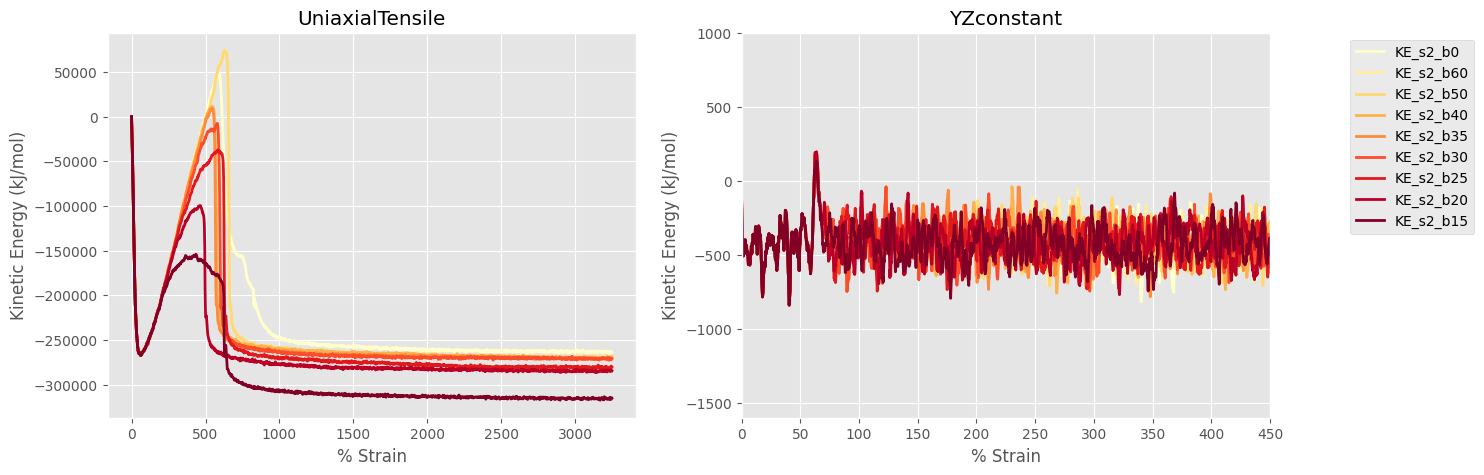

In [35]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 5)
s = seed
colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part
# ax[0].axis([0, 900, -1700, 1700])
ax[0].grid(True)

lines = {}

cl = 0

for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[0].plot(
        logld[s, bb][:, 0] * 2.5 / 10000,
        (logld[s, bb][:, 3] - logld[s, bb][:, 3][0])*4.184,
        # savgol_filter(((logld[s, bb][:, 1] - logld[s, bb][:, 1][0])*4.184),20,3),
        # yerr=rogldavg[s,bb][:, 2],
        label="KE_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[0].set_xlabel("% Strain")
ax[0].set_ylabel("Kinetic Energy (kJ/mol)")
# ax[0].legend()
ax[0].set_title("UniaxialTensile")

# YZconstant part
ax[1].axis([0, 450, -1600, 1000])
ax[1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[1].errorbar(
        logyz[s, bb][:, 0] * 2.5 / 10000,
        # (logyz[s, bb][:, 1] - logyz[s, bb][:, 1][0])*4.184,
        savgol_filter(((logyz[s, bb][:, 1] - logyz[s, bb][:, 1][0])*4.184),20,3),
        # yerr=rogyzavg[s,bb][:, 2],
        label="KE_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[1].set_xlabel("% Strain")
ax[1].set_ylabel("Kinetic Energy (kJ/mol)")
ax[1].legend(bbox_to_anchor=(1.4, 1), loc="upper right")
ax[1].set_title("YZconstant")

plt.show()

### Bond potential plot

In [1]:
bondrr = np.loadtxt("bondRR.txt")
bondrs = np.loadtxt("bondRS.txt")
bondss = np.loadtxt("bondSS.txt")

NameError: name 'np' is not defined

In [ ]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 1)

fig.set_size_inches(8, 5)

colormap = plt.cm.Dark2(np.linspace(0, 1, 9))

ax.axis([0, 10, -10 , 100])
ax.grid(True)

lines = {}

lines[1] = ax.plot(
        bondrr[:, 1],
        bondrr[:, 2]/0.1987204259,
        "-",
        label="R-R",
        color=colormap[0],
    )

lines[2] = ax.plot(
        bondrs[:, 1],
        bondrs[:, 2]/0.1987204259,
        "-",
        label="R-S",
        color=colormap[3],
    )

lines[3] = ax.plot(
        bondss[:, 1],
        bondss[:, 2]/0.1987204259,
        "-",
        label="S-S",
        color=colormap[5],
    )

# lines[4] = ax.plot(
#         bondss[:, 1],
#         15,
#         "-.",
#         # label="S-S",
#         color="black",
#     )

ax.hlines(y=15,xmin=0,xmax=10,linestyle="--",color="gray")
ax.hlines(y=20,xmin=0,xmax=10,linestyle="--",color="gray")
ax.hlines(y=25,xmin=0,xmax=10,linestyle="--",color="gray")
ax.hlines(y=30,xmin=0,xmax=10,linestyle="--",color="gray")
ax.hlines(y=35,xmin=0,xmax=10,linestyle="--",color="gray")
ax.hlines(y=40,xmin=0,xmax=10,linestyle="--",color="gray")
ax.hlines(y=50,xmin=0,xmax=10,linestyle="--",color="gray")
ax.hlines(y=60,xmin=0,xmax=10,linestyle="--",color="gray")


    

ax.set_xlabel("Distance (Å)")
ax.set_ylabel("Bond Potential ($k_{b}T$)")
ax.legend()
yticks = np.arange(-10, 100, 10)
xticks = np.arange(0, 10, 1)
ax.set_yticks(yticks)
ax.set_xticks(xticks)
# ax.set_title("Bond potential")
plt.savefig("bond_pot.pdf")
plt.show()

### Box volume

In [4]:
import MDAnalysis as mda
from MDAnalysis import coordinates

In [125]:
def xtc_to_boxdim(datafile,xtcfile,timestrainfile,simtype):
    u = mda.Universe(datafile,xtcfile)
    box_data=[]
    for ts in u.trajectory:
        box_data.append([ts.time, ts.volume])
    box_data=np.array(box_data)
    if simtype=="ld":
        df=25
        tf=5000
    else:
        df=5
        tf=1000
    box_data[:,0]=(box_data[:,0]/df)*tf
    timestrain = np.loadtxt(timestrainfile, skiprows=1, usecols=(0, 1))
    strain = timestrain[np.where(timestrain[:,:1]%tf==0)[0]][:,1]
    box_dim = np.hstack((box_data,strain.reshape((len(strain),1))))
    return box_dim

In [126]:
boxld = {}
boxyz = {}
timestrainld={}
timestrainyz={}
datafile={}
xtcldfile={}
xtcyzfile={}
seeds = [2]
for s in seeds:
    for bb in bndbrkthresh:
        datafile = ("seed{s}/cgps_check_cooled.data".format(s=s))

        print(f"seed {s} bb {bb} ld")
        xtcldfile = ("seed{s}/UniaxialTensile/ld{bb}/cgps.xtc".format(s=s, bb=bb))
        timestrainldfile = ("seed{s}/UniaxialTensile/ld{bb}/stress_strain_box.dat".format(s=s, bb=bb))
        boxld[s, bb] = xtc_to_boxdim(datafile,xtcldfile,timestrainldfile,"ld")

        print(f"seed {s} bb {bb} yz")
        xtcyzfile = "seed{s}/YZconstant/yz{bb}/cgps.xtc".format(s=s, bb=bb)
        timestrainyzfile = ("seed{s}/YZconstant/yz{bb}/stress_strain_box.dat".format(s=s, bb=bb))
        boxyz[s, bb] = xtc_to_boxdim(datafile,xtcyzfile,timestrainyzfile,"yz")

seed 2 bb 15 ld
seed 2 bb 15 yz
seed 2 bb 20 ld
seed 2 bb 20 yz
seed 2 bb 25 ld


Exception ignored in: <function ReaderBase.__del__ at 0x7f83a7837010>
Traceback (most recent call last):
  File "/home/yjain/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py", line 1532, in __del__
    self.close()
  File "/home/yjain/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/chain.py", line 597, in close
    self._apply('close')
  File "/home/yjain/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/chain.py", line 504, in _apply
    return [reader.__getattribute__(method)(**kwargs) for reader in self.readers]
AttributeError: 'ChainReader' object has no attribute 'readers'
Exception ignored in: <function ReaderBase.__del__ at 0x7f83a7837010>
Traceback (most recent call last):
  File "/home/yjain/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/base.py", line 1532, in __del__
    self.close()
  File "/home/yjain/.local/lib/python3.10/site-packages/MDAnalysis/coordinates/chain.py", line 597, in close
    self._apply('close')
  File "/h

seed 2 bb 25 yz
seed 2 bb 30 ld
seed 2 bb 30 yz
seed 2 bb 35 ld
seed 2 bb 35 yz
seed 2 bb 40 ld
seed 2 bb 40 yz
seed 2 bb 50 ld
seed 2 bb 50 yz
seed 2 bb 60 ld
seed 2 bb 60 yz
seed 2 bb 0 ld
seed 2 bb 0 yz


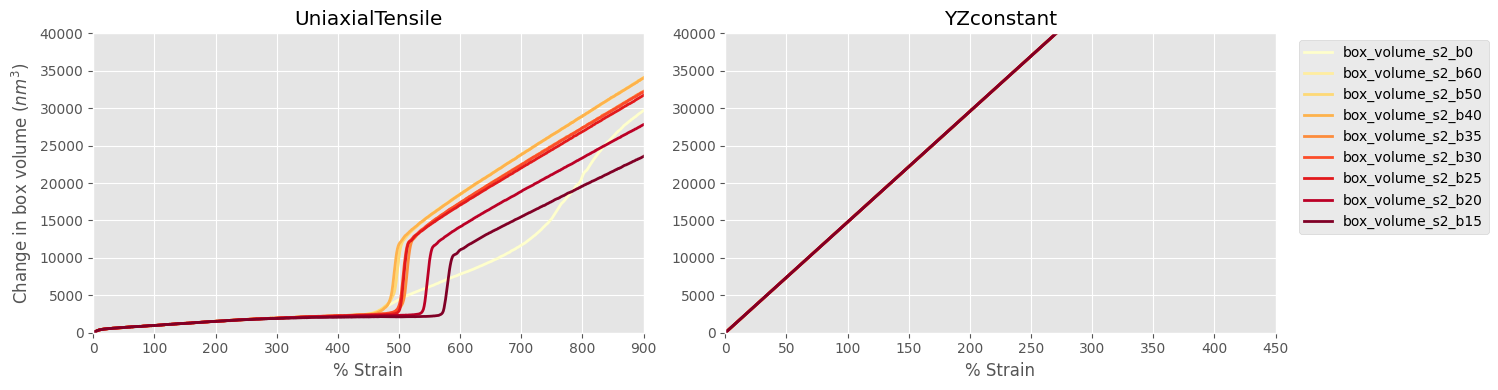

In [168]:
plt.style.use("ggplot")
fig, ax = plt.subplots(1, 2)
fig.set_size_inches(15, 4)
s = 2
colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part
ax[0].axis([0, 900, 0, 40000])
ax[0].grid(True)

lines = {}

cl = 0

for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[0].plot(
        boxld[s, bb][:, 2],
        (boxld[s, bb][:, 1] - boxld[s, bb][:, 1][0]) * 1e-3,
        label="box_volume_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[0].set_xlabel("% Strain")
ax[0].set_ylabel("Change in box volume ($nm^3$)")
# ax[0].legend()
ax[0].set_title("UniaxialTensile")

# YZconstant part
ax[1].axis([0, 450, 0, 40000])
ax[1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    lines[s, bb] = ax[1].plot(
        boxyz[s, bb][:, 2],
        (boxyz[s, bb][:, 1] - boxyz[s, bb][:, 1][0]) * 1e-3,
        label="box_volume_s{s}_b{bb}".format(s=s, bb=bb),
        color=colormap[cl],
        linewidth=2,
    )
    cl += 1

ax[1].set_xlabel("% Strain")
# ax[1].set_ylabel("box volume $nm^3$")
ax[1].legend(bbox_to_anchor=(1.4, 1), loc="upper right")
ax[1].set_title("YZconstant")
plt.tight_layout()
plt.savefig("box_vol_change.png")
plt.show()

In [161]:
seeds = [2]
for s in seeds:
    for bb in bndbrkthresh:
        np.savetxt(f"volumes/vol_delta_free_{s}_{bb}.dat",boxld[s,bb],header="timestep    volume   strain%")
        np.savetxt(f"volumes/vol_delta_fixed_{s}_{bb}.dat",boxyz[s,bb],header="timestep    volume   strain%")

### Final plot

In [15]:
meanstressld_vol={}
errorstressld_vol={}
meanstressyz_vol={}
errorstressyz_vol={}
for bb in bndbrkthresh:
        meanstressld_vol[bb] = np.mean((get_vol_part(stresstrainld[2,bb]),get_vol_part(stresstrainld[4,bb]),get_vol_part(stresstrainld[5,bb])),axis=0)
        errorstressld_vol[bb] = np.std((get_vol_part(stresstrainld[2,bb]),get_vol_part(stresstrainld[4,bb]),get_vol_part(stresstrainld[5,bb])),axis=0)
        meanstressyz_vol[bb] = np.mean((get_vol_part(stresstrainyz[2,bb]),get_vol_part(stresstrainyz[4,bb]),get_vol_part(stresstrainyz[5,bb])),axis=0)
        errorstressyz_vol[bb] = np.std((get_vol_part(stresstrainyz[2,bb]),get_vol_part(stresstrainyz[4,bb]),get_vol_part(stresstrainyz[5,bb])),axis=0)

In [16]:
meanbondsld={}
errorbondsld={}
meanbondsyz={}
errorbondsyz={}
for bb in bndbrkthresh:
        meanbondsld[bb] = np.mean((numbondsld[2,bb],numbondsld[4,bb],numbondsld[5,bb]),axis=0)
        errorbondsld[bb] = np.std((numbondsld[2,bb],numbondsld[4,bb],numbondsld[5,bb]),axis=0)
        meanbondsyz[bb] = np.mean((numbondsyz[2,bb],numbondsyz[4,bb],numbondsyz[5,bb]),axis=0)
        errorbondsyz[bb] = np.std((numbondsyz[2,bb],numbondsyz[4,bb],numbondsyz[5,bb]),axis=0)

In [17]:
meanstressldxx_dev={}
errorstressldxx_dev={}
meanstressyzxx_dev={}
errorstressyzxx_dev={}
for bb in bndbrkthresh:
        meanstressldxx_dev[bb] = np.mean((get_dev_part(stresstrainld[2,bb],"xx"),get_dev_part(stresstrainld[4,bb],"xx"),get_dev_part(stresstrainld[5,bb],"xx")),axis=0)
        errorstressldxx_dev[bb] = np.std((get_dev_part(stresstrainld[2,bb],"xx"),get_dev_part(stresstrainld[4,bb],"xx"),get_dev_part(stresstrainld[5,bb],"xx")),axis=0)
        meanstressyzxx_dev[bb] = np.mean((get_dev_part(stresstrainyz[2,bb],"xx"),get_dev_part(stresstrainyz[4,bb],"xx"),get_dev_part(stresstrainyz[5,bb],"xx")),axis=0)
        errorstressyzxx_dev[bb] = np.std((get_dev_part(stresstrainyz[2,bb],"xx"),get_dev_part(stresstrainyz[4,bb],"xx"),get_dev_part(stresstrainyz[5,bb],"xx")),axis=0)

In [18]:
meanstressldyy_dev={}
errorstressldyy_dev={}
meanstressyzyy_dev={}
errorstressyzyy_dev={}
for bb in bndbrkthresh:
        meanstressldyy_dev[bb] = np.mean((get_dev_part(stresstrainld[2,bb],"yy"),get_dev_part(stresstrainld[4,bb],"yy"),get_dev_part(stresstrainld[5,bb],"yy")),axis=0)
        errorstressldyy_dev[bb] = np.std((get_dev_part(stresstrainld[2,bb],"yy"),get_dev_part(stresstrainld[4,bb],"yy"),get_dev_part(stresstrainld[5,bb],"yy")),axis=0)
        meanstressyzyy_dev[bb] = np.mean((get_dev_part(stresstrainyz[2,bb],"yy"),get_dev_part(stresstrainyz[4,bb],"yy"),get_dev_part(stresstrainyz[5,bb],"yy")),axis=0)
        errorstressyzyy_dev[bb] = np.std((get_dev_part(stresstrainyz[2,bb],"yy"),get_dev_part(stresstrainyz[4,bb],"yy"),get_dev_part(stresstrainyz[5,bb],"yy")),axis=0)

In [19]:
meanstressldzz_dev={}
errorstressldzz_dev={}
meanstressyzzz_dev={}
errorstressyzzz_dev={}
for bb in bndbrkthresh:
        meanstressldzz_dev[bb] = np.mean((get_dev_part(stresstrainld[2,bb],"zz"),get_dev_part(stresstrainld[4,bb],"zz"),get_dev_part(stresstrainld[5,bb],"zz")),axis=0)
        errorstressldzz_dev[bb] = np.std((get_dev_part(stresstrainld[2,bb],"zz"),get_dev_part(stresstrainld[4,bb],"zz"),get_dev_part(stresstrainld[5,bb],"zz")),axis=0)
        meanstressyzzz_dev[bb] = np.mean((get_dev_part(stresstrainyz[2,bb],"zz"),get_dev_part(stresstrainyz[4,bb],"zz"),get_dev_part(stresstrainyz[5,bb],"zz")),axis=0)
        errorstressyzzz_dev[bb] = np.std((get_dev_part(stresstrainyz[2,bb],"zz"),get_dev_part(stresstrainyz[4,bb],"zz"),get_dev_part(stresstrainyz[5,bb],"zz")),axis=0)

In [20]:
def plot_curves_mean(bndbrkthresh,data,error,axis,typ):
    lines = {}
    cl = 0
    for bb in np.flip(bndbrkthresh):
        
        if typ=="ld":
            steps = meanstressld[bb][:, 0]
        else:
            steps = meanstressyz[bb][:, 0]
            
        if bb==0:
            lines[bb, 2] = axis.plot(
                steps,
                data[bb],
                "-",
                label="$E^b$ = $\infty$",
                color=colormap[cl],
            )
        else:
            lines[bb, 2] = axis.plot(
                steps,
                data[bb],
                "-",
                label="$E^b$ = {bb}".format(bb=bb),
                color=colormap[cl],
            )
    
        errors[bb, 2] = axis.errorbar(
            steps,
            data[bb],
            yerr=error[bb],
            fmt='none',
            ecolor=colormap[cl],
            alpha=0.1
        )
        cl += 1

def plot_curves_mean_bonds(bndbrkthresh,data,error,axis):
    lines = {}
    cl = 0
    for bb in np.flip(bndbrkthresh):
        steps = data[bb][:,0] * 2.5 / 10000
        
        if bb==0:
            lines[bb, 3] = axis.plot(
                steps,
                -(data[bb][:,2] - data[bb][:,2][0]),
                "-",
                label="$E^b$ = $\infty$",
                color=colormap[cl],
            )
        else:
            lines[bb, 3] = axis.plot(
                steps,
                -(data[bb][:,2] - data[bb][:,2][0]),
                "-",
                label="$E^b$ = {bb}".format(bb=bb),
                color=colormap[cl],
            )
    
        errors[bb, 3] = axis.errorbar(
            steps,
            -(data[bb][:,2] - data[bb][:,2][0]),
            yerr=error[bb][:,2],
            fmt='none',
            ecolor=colormap[cl],
            alpha=0.1
        )
        cl += 1

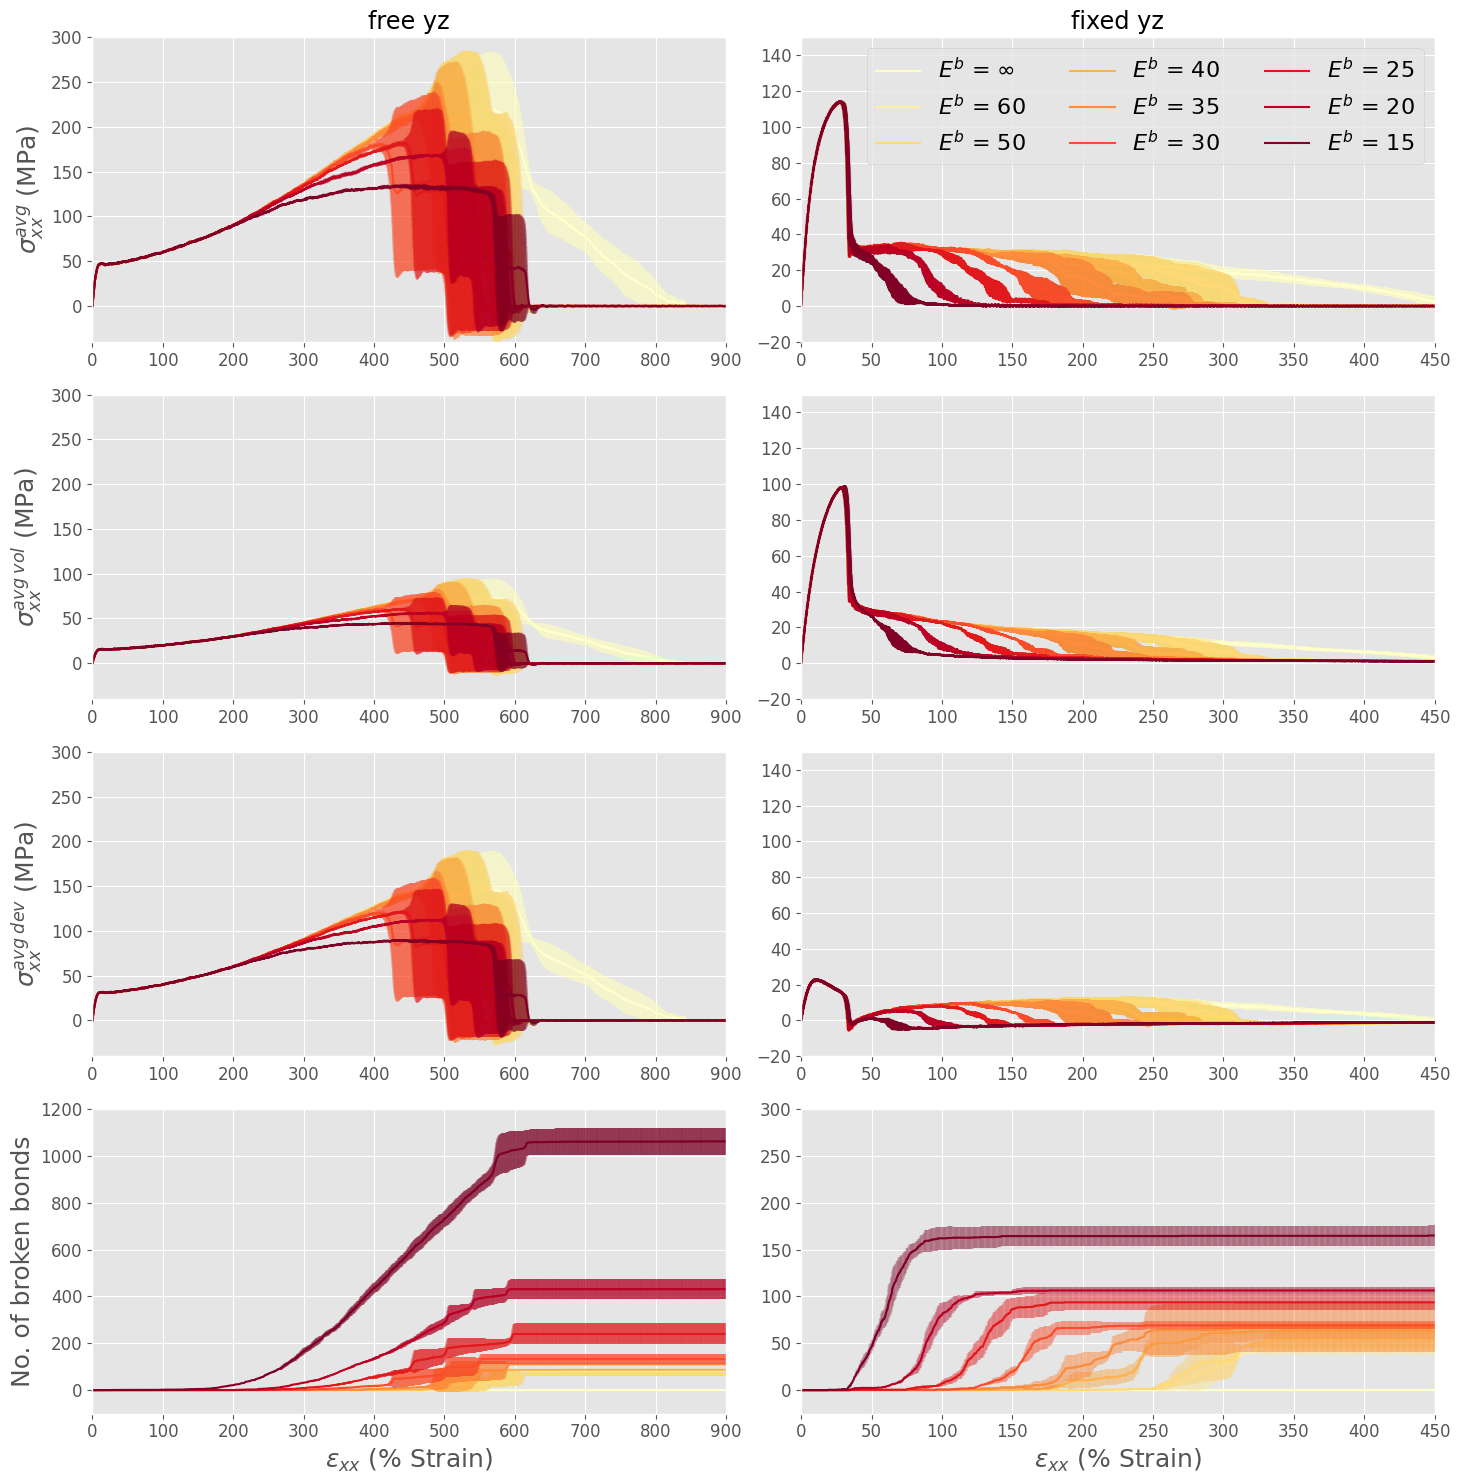

In [26]:
plt.style.use("ggplot")
from matplotlib.ticker import FormatStrFormatter
plt.rcParams.update({'font.size': 12})
fig, ax = plt.subplots(4, 2)
seed=2
fig.set_size_inches(15, 15)

colormap = plt.cm.YlOrRd(np.linspace(0, 1, len(bndbrkthresh)))

# UniaxialTensile part
axbnd = [0, 900, -40, 300]
ax[0,0].axis(axbnd)
ax[0,0].grid(True)

lines = {}
errors= {}

cl = 0
for bb in np.flip(bndbrkthresh):
    inflpt = np.gradient(meanstressld[bb][:, 1]).argmin()

    inflpt_i = inflpt - 80
    pty = meanstressld[bb][inflpt_i:inflpt, 1].max()
    maxindex = inflpt_i + meanstressld[bb][inflpt_i:inflpt, 1].argmax()
    ptx = meanstressld[bb][maxindex, 0]

    lines[bb, 0] = ax[0,0].plot(
        meanstressld[bb][:, 0],
        meanstressld[bb][:, 1],
        "-",
        label="$E^b$ = {bb}".format(bb=bb),
        color=colormap[cl],
    )

    errors[bb, 0] = ax[0,0].errorbar(
        meanstressld[bb][:, 0],
        meanstressld[bb][:, 1],
        yerr=errorstressld[bb][:,1],
        fmt='none',
        ecolor=colormap[cl],
        alpha=0.1
    )

    cl += 1

# ax[0,0].set_xlabel("% Strain")
ax[0,0].set_ylabel("$\sigma^{avg}_{xx}$ (MPa)", fontsize =18)
# ax[0, 0].legend()
ax[0,0].set_title("free yz")

# YZconstant part
axbnd2= [0, 450, -20, 150]
ax[0,1].axis(axbnd2)
ax[0,1].grid(True)

lines = {}

cl = 0
for bb in np.flip(bndbrkthresh):
    if bb==0:
        lines[bb, 1] = ax[0,1].plot(
            meanstressyz[bb][:, 0],
            meanstressyz[bb][:, 1],
            "-",
            label="$E^b$ = $\infty$",
            color=colormap[cl],
        )
    else:
        lines[bb, 1] = ax[0,1].plot(
            meanstressyz[bb][:, 0],
            meanstressyz[bb][:, 1],
            "-",
            label="$E^b$ = {bb}".format(bb=bb),
            color=colormap[cl],
        )

    errors[bb, 1] = ax[0,1].errorbar(
        meanstressyz[bb][:, 0],
        meanstressyz[bb][:, 1],
        yerr=errorstressyz[bb][:,1],
        fmt='none',
        ecolor=colormap[cl],
        alpha=0.1
    )

    cl += 1

# ax[0,1].set_xlabel("% Strain")
#ax[0,1].set_ylabel("$Mean$ $Stress_{xx}$ (MPa)")
ax[0,1].legend(ncol=3,fontsize=16)
ax[0,1].set_title("fixed yz")

#########################################


ax[1,0].axis(axbnd)
ax[1,0].grid(True)
ax[1,0].set_ylabel("$\sigma^{avg\;vol}_{xx}$ (MPa)",fontsize = 18)
plot_curves_mean(bndbrkthresh,meanstressld_vol,errorstressld_vol,ax[1,0],"ld")

##################################################

ax[1,1].axis(axbnd2)
ax[1,1].grid(True)
plot_curves_mean(bndbrkthresh,meanstressyz_vol,errorstressyz_vol,ax[1,1],"yz")

#########################################


ax[2,0].axis(axbnd)
ax[2,0].grid(True)
ax[2,0].set_ylabel("$\sigma^{avg\;dev}_{xx}$ (MPa)",fontsize = 18)
plot_curves_mean(bndbrkthresh,meanstressldxx_dev,errorstressldxx_dev,ax[2,0],"ld")

##################################################

ax[2,1].axis(axbnd2)
ax[2,1].grid(True)
plot_curves_mean(bndbrkthresh,meanstressyzxx_dev,errorstressyzxx_dev,ax[2,1],"yz")



#########################################


ax[3,0].axis([0,900,-100,1200])
ax[3,0].grid(True)
ax[3,0].set_ylabel("No. of broken bonds",fontsize = 18)
ax[3,0].set_xlabel("$\epsilon_{xx}$ (% Strain)",fontsize = 18)
plot_curves_mean_bonds(bndbrkthresh,meanbondsld,errorbondsld,ax[3,0])

##################################################

ax[3,1].axis([0,450,-25,300])
ax[3,1].grid(True)
ax[3,1].set_xlabel("$\epsilon_{xx}$ (% Strain)",fontsize = 18)
plot_curves_mean_bonds(bndbrkthresh,meanbondsyz,errorbondsyz,ax[3,1])

plt.tight_layout()
plt.savefig("final_plots.png")